# Importstatements


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pingouin as pg
from factor_analyzer import FactorAnalyzer 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# 1. Importing and merging datasets

In [2]:
df_april = pd.read_csv('Data_april.csv', delimiter=';')
df_december = pd.read_csv('Data_december.csv', delimiter=';')


In [3]:
df_april.head()

,Progress,Duration (in seconds),Finished,ExternalReference,DistributionChannel,UserLanguage,Location_1,Age_2,Gender_3,Gender_3_5_TEXT,...,TakingInitiatives_37_3,TakingInitiatives_37_4,TakingInitiatives_37_5,TakingInitiatives_38,Coaching_39,PairProgramming_40,Role_41,Role_41_8_TEXT,ProjectScope_42,Technologies_43
0,100,694,True,NaN,anonymous,EN,United Kingdom,30 years or younger,Female,NaN,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I dont remember conducting anything of this so...,Never,Sometimes,Senior software engineer,NaN,We are finding prospect customers for our clie...,"Scala, spark, HTML, typescript,CSS, Elasticsea..."
1,100,803,True,NaN,anonymous,EN,Netherlands,30 years or younger,Male,NaN,...,Somewhat agree,Strongly agree,Strongly agree,We've experimented with different code styles ...,About half the time,Sometimes,"Software developers (including Front End, Back...",NaN,It's a project that's used by the different un...,"C#, .NET, .NET Core, Scriptcase, PHP, SQL, Vis..."
2,100,620,True,NaN,anonymous,EN,United Kingdom,Over 51 years old,Male,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,"nothing springs to mind, there isn't usually t...",Never,About half the time,Senior software engineer,NaN,"Universe Databasic, System Builder 4GL - old t...",manual and auto testing tools - mainly manual ...
3,100,803,True,NaN,anonymous,EN,Denmark,30 years or younger,Female,NaN,...,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,(1) I set up a dedicated testing flow to be do...,Sometimes,Sometimes,Senior software engineer,NaN,We are building a dashboard for monitoring our...,"Answer as software engineer: we use Python, An..."
4,100,1012,True,NaN,anonymous,EN,Poland,31 - 40 years,Male,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,New graphical interface for displaying data.\n...,Never,Sometimes,Software engineer,NaN,"using C #, we are working on an application th...","uniform perception of SCRUM artifacts, and Scr..."


In [4]:
df_december.head()

,Progress,Duration (in seconds),Finished,DistributionChannel,UserLanguage,Location_1,Age_2,Gender_3,Gender_3_5_TEXT,Role_4,...,TakingInitiatives_37_3,TakingInitiatives_37_4,TakingInitiatives_37_5,TakingInitiatives_38,Coaching_39,PairProgramming_40,Role_41,Role_41_8_TEXT,ProjectScope_42,Technologies_43
0,100,629,True,anonymous,EN,Portugal,30 years or younger,Male,NaN,Other (please specify below),...,Strongly agree,Strongly agree,Strongly agree,NaN,About half the time,Sometimes,Other (please specify below),Data Scientist,We work with environmental data and create sof...,"We use mostly Phyton and JavaScript, depending..."
1,100,760,True,anonymous,EN,Poland,30 years or younger,Male,NaN,"Software developers (including Front End, Back...",...,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,I didn't conduct any experiment or initiatives.,Sometimes,Sometimes,"Software developers (including Front End, Back...",NaN,I am a front end developer. I work on a projec...,I mostly use JavaScript and TypeScript. When i...
2,100,863,True,anonymous,EN,United Kingdom,30 years or younger,Male,NaN,Senior software engineer,...,Somewhat agree,Strongly agree,Strongly agree,A/B Testing - we've released two different bra...,About half the time,Always,Senior software engineer,NaN,"As stated at the start of the survey, we are g...",Java predominately but more and more looking a...
3,100,754,True,anonymous,EN,United Kingdom,31 - 40 years,Male,NaN,Senior software engineer,...,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,"Improving our testing framework, improving our...",Sometimes,Never,Senior software engineer,NaN,I already did that at the start. :)\nWe are cu...,"C, C++, Git, GitLab, in-house testing framewor..."
4,100,720,True,anonymous,EN,Poland,30 years or younger,Male,NaN,Software engineer,...,Strongly disagree,Somewhat agree,Somewhat disagree,1) We experimented with the use of 3D printers...,Sometimes,Never,Software engineer,NaN,"Again, same question as before.\nReleasing a i...","C#, C++ , Swift, Rendering software. Maya, Tre..."


In [5]:
data = pd.concat([df_april, df_december], ignore_index=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 109 entries, Progress to Technologies_43
dtypes: bool(1), float64(3), int64(2), object(103)
memory usage: 418.3+ KB


# 2. Checking the data for missteps and other elements that should not be included.


In [7]:
data['Progress'].value_counts()

100    492
2        2
42       1
Name: Progress, dtype: int64

In [8]:
data['Finished'].value_counts()

True     492
False      3
Name: Finished, dtype: int64

In [9]:
data['AttentionCheck_23_1'].value_counts(), data['AttentionCheck_36'].value_counts()


(Strongly agree       483
 Somewhat agree         5
 Somewhat disagree      2
 Strongly disagree      2
 Name: AttentionCheck_23_1, dtype: int64,
 Casablanca    491
 New York        1
 Name: AttentionCheck_36, dtype: int64)

In [10]:
att_list = list(['AttentionCheck_23_1','AttentionCheck_36', 'Finished', 'Progress'])

In [11]:
att_dict={'New York':np.nan, 'Somewhat agree':np.nan, 'Somewhat disagree':np.nan, 'Strongly disagree':np.nan, 42:np.nan, 2:np.nan, False:np.nan}

In [12]:
data.loc[:, att_list] = data.loc[:, att_list].replace(att_dict)

In [13]:
data

,Progress,Duration (in seconds),Finished,ExternalReference,DistributionChannel,UserLanguage,Location_1,Age_2,Gender_3,Gender_3_5_TEXT,...,TakingInitiatives_37_3,TakingInitiatives_37_4,TakingInitiatives_37_5,TakingInitiatives_38,Coaching_39,PairProgramming_40,Role_41,Role_41_8_TEXT,ProjectScope_42,Technologies_43
0,100.0,694,True,NaN,anonymous,EN,United Kingdom,30 years or younger,Female,NaN,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I dont remember conducting anything of this so...,Never,Sometimes,Senior software engineer,NaN,We are finding prospect customers for our clie...,"Scala, spark, HTML, typescript,CSS, Elasticsea..."
1,100.0,803,True,NaN,anonymous,EN,Netherlands,30 years or younger,Male,NaN,...,Somewhat agree,Strongly agree,Strongly agree,We've experimented with different code styles ...,About half the time,Sometimes,"Software developers (including Front End, Back...",NaN,It's a project that's used by the different un...,"C#, .NET, .NET Core, Scriptcase, PHP, SQL, Vis..."
2,100.0,620,True,NaN,anonymous,EN,United Kingdom,Over 51 years old,Male,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,"nothing springs to mind, there isn't usually t...",Never,About half the time,Senior software engineer,NaN,"Universe Databasic, System Builder 4GL - old t...",manual and auto testing tools - mainly manual ...
3,100.0,803,True,NaN,anonymous,EN,Denmark,30 years or younger,Female,NaN,...,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,(1) I set up a dedicated testing flow to be do...,Sometimes,Sometimes,Senior software engineer,NaN,We are building a dashboard for monitoring our...,"Answer as software engineer: we use Python, An..."
4,100.0,1012,True,NaN,anonymous,EN,Poland,31 - 40 years,Male,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,New graphical interface for displaying data.\n...,Never,Sometimes,Software engineer,NaN,"using C #, we are working on an application th...","uniform perception of SCRUM artifacts, and Scr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,100.0,624,True,NaN,anonymous,EN,Portugal,30 years or younger,Male,NaN,...,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,"Implemented Automatic Tests, and change the de...",About half the time,Sometimes,Tech Lead,NaN,It's a project where we do appraisals for cryp...,"We use Python, MongoDB, and React. We use AWS ..."
491,100.0,942,True,NaN,anonymous,EN,United Kingdom,41 - 50 years,Male,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,The most enjoyable has been a kind of adversar...,About half the time,Sometimes,Senior software engineer,NaN,We are working on software to improve online d...,"Most development is in Python, using a range o..."
492,100.0,1855,True,NaN,anonymous,EN,United Kingdom,31 - 40 years,Male,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,We re-assed an entire system after having to m...,Sometimes,Never,"Software developers (including Front End, Back...",NaN,Adding an admin interface to an existing syste...,"Minimal QA due to small teams, but general rev..."
493,100.0,1305,True,NaN,anonymous,EN,United States,30 years or younger,Male,NaN,...,Somewhat agree,Strongly agree,Strongly agree,I often use Java Unit testing for the software...,About half the time,Most of the time,"Software developers (including Front End, Back...",NaN,My team is currently working to build a softwa...,My team uses Java for it's software solutions....


In [14]:
data['AttentionCheck_23_1'].value_counts(), data['AttentionCheck_36'].value_counts()

(Strongly agree    483
 Name: AttentionCheck_23_1, dtype: int64,
 Casablanca    491
 Name: AttentionCheck_36, dtype: int64)

In [15]:
data['Role'] = np.where(data['Role_4'] == data['Role_41'], data['Role_4'], np.nan)

In [16]:
data['Role'].value_counts()

Software engineer                                                       146
Senior software engineer                                                 83
Software developers (including Front End, Back End developers, etc.)     57
Tech Lead                                                                55
Quality assurance analyst                                                33
QA Lead                                                                  29
Quality assurance engineer                                               28
Solution architect                                                       27
Other (please specify below)                                             11
DevOps Engineer                                                          10
Release Engineer                                                          1
Name: Role, dtype: int64

# 3. Creation of sub_set

In [17]:
sub_data = data[['Location_1', 'Age_2', 'Gender_3', 'Role_4', 'Experience_5', 'AgileExp_6', 'Education_7', 'AgileMethod_9', 'TeamSize_10', 'MultiFunc_12_1', 'SoftDev_13', 'InHouseOutsource_15', 'MultipleTeams_17',
                 'WorkingTogether_14',
                 'Colocated_16',
                 'PS_18_1', 'PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7', 
                 'Leadership_19_1', 'Leadership_19_2', 'Leadership_19_3', 
                 'Leadership_20_1', 'Leadership_20_2', 'Leadership_20_3', 
                 'Leadership_21_1', 'Leadership_21_2', 'Leadership_21_3', 'Leadership_21_4', 
                 'Leadership_22_1', 'Leadership_22_2', 'Leadership_22_3', 'Leadership_22_4', 'Leadership_22_5',
                 'Autonomy_24_1', 'Autonomy_24_2', 'Autonomy_24_3', 'Autonomy_24_4', 'Autonomy_24_5', 'Autonomy_24_6',
                 'DecisionMaking_25_1', 'DecisionMaking_25_2', 'DecisionMaking_25_3', 'DecisionMaking_25_4', 
                 'NoBlame_28_1', 'NoBlame_28_2', 'NoBlame_28_3', 
                 'Openness_29_1', 'Openness_29_2', 'Openness_29_3', 'Openness_29_4', 'Openness_29_5', 
                 'SpeakingUp_30_1', 'SpeakingUp_30_2', 'SpeakingUp_30_3', 'SpeakingUp_30_4',
                 'LearningMistakes_33_1', 'LearningMistakes_33_2', 'LearningMistakes_33_3',
                 'AttentionCheck_23_1', 'AttentionCheck_36', 'Role']] 
                 

sub_data = sub_data.dropna()

# 4. Adapting control variables

## 4.1 Gender

In [18]:
gender_replacer = {'Male' : 0, 'Female' : 1, 'Non-binary / third gender' : np.nan}

In [19]:
Female = sub_data['Gender_3'].replace(gender_replacer)

Female = Female.dropna()

In [20]:
sub_data.loc[:,'Gender'] = Female

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/826725688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Gender'] = Female


In [21]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4,LearningMistakes_33_1,LearningMistakes_33_2,LearningMistakes_33_3,AttentionCheck_23_1,AttentionCheck_36,Role,Gender
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,1.0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,Neither agree nor disagree,​​​​​​​Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,0.0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,1.0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,Software engineer,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,Tech Lead,0.0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,Senior software engineer,0.0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0


sub_data = sub_data.dropna()

sub_data.loc[:,'Gender'] = sub_data['Gender'].astype(bool)

In [22]:
sub_data['Gender'].dtype

dtype('float64')

## 4.2 TeamSize

In [23]:
sub_data['TeamSize_10'].value_counts()

5.0      91
6.0      84
8.0      65
7.0      46
4.0      43
10.0     43
12.0     23
15.0     20
3.0      19
9.0      14
20.0     11
2.0       6
11.0      6
25.0      5
14.0      4
23.0      3
35.0      2
13.0      2
17.0      1
18.0      1
28.0      1
100.0     1
16.0      1
22.0      1
Name: TeamSize_10, dtype: int64

In [24]:
TeamSize_replacer = {100 : np.nan}

In [25]:
sub_data.loc[:,'TeamSize'] = sub_data.loc[:,'TeamSize_10'].replace(TeamSize_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/3693814422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'TeamSize'] = sub_data.loc[:,'TeamSize_10'].replace(TeamSize_replacer)


In [26]:
sub_data['TeamSize'].value_counts()

5.0     91
6.0     84
8.0     65
7.0     46
4.0     43
10.0    43
12.0    23
15.0    20
3.0     19
9.0     14
20.0    11
11.0     6
2.0      6
25.0     5
14.0     4
23.0     3
35.0     2
13.0     2
17.0     1
18.0     1
28.0     1
16.0     1
22.0     1
Name: TeamSize, dtype: int64

In [27]:
sub_data['TeamSize_10'].value_counts()

5.0      91
6.0      84
8.0      65
7.0      46
4.0      43
10.0     43
12.0     23
15.0     20
3.0      19
9.0      14
20.0     11
2.0       6
11.0      6
25.0      5
14.0      4
23.0      3
35.0      2
13.0      2
17.0      1
18.0      1
28.0      1
100.0     1
16.0      1
22.0      1
Name: TeamSize_10, dtype: int64

In [28]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,SpeakingUp_30_3,SpeakingUp_30_4,LearningMistakes_33_1,LearningMistakes_33_2,LearningMistakes_33_3,AttentionCheck_23_1,AttentionCheck_36,Role,Gender,TeamSize
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,1.0,7.0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0,10.0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,​​​​​​​Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,0.0,5.0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,1.0,6.0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,Strongly agree,Strongly agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,Software engineer,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,Tech Lead,0.0,5.0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,Senior software engineer,0.0,6.0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0,2.0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0,5.0


## 4.3 Experience

In [29]:
sub_data['Experience_5'].value_counts()

3 - 5 years           155
More than 12 years    115
6 - 8 years            90
Less than 3 years      85
9 - 11 years           48
Name: Experience_5, dtype: int64

In [30]:
Experience = pd.get_dummies(sub_data['Experience_5'])

In [31]:
Experience

,3 - 5 years,6 - 8 years,9 - 11 years,Less than 3 years,More than 12 years
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
490,1,0,0,0,0
491,0,0,0,0,1
492,0,0,1,0,0
493,0,1,0,0,0


In [32]:
sub_data.loc[:,('Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years')] = Experience[['Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/3603243999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years')] = Experience[['Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/3603243999.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('Less than 3 years', '3 - 5 years', '6 - 8 year

## 4.4 Role

In [33]:
role_replacer = {'Software developers (including Front End, Back End developers, etc.)' : 'Software developer', 
                 'Quality assurance analyst' : 'QA', 
                 'Quality assurance engineer' : 'QA', 
                 'QA Lead' : 'QA',
                 'Solution architect' : 'Other',
                 'Other (please specify below)' : 'Other',
                 'DevOps Engineer' : 'Other',
                 'Release Engineer' : 'Other'
                }

In [34]:
sub_data.loc[:,'Role'] = sub_data['Role'].replace(role_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/3063579167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Role'] = sub_data['Role'].replace(role_replacer)


In [35]:
Role = pd.get_dummies(sub_data['Role'])

In [36]:
Role

,Other,QA,Senior software engineer,Software developer,Software engineer,Tech Lead
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
490,0,0,0,0,0,1
491,0,0,1,0,0,0
492,0,0,0,1,0,0
493,0,0,0,1,0,0


In [37]:
sub_data.loc[:,('Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other')] = Role[['Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/770915879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other')] = Role[['Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/770915879.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('Software developer', 'Software eng

In [38]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,3 - 5 years,6 - 8 years,9 - 11 years,More than 12 years,Software developer,Software engineer,Senior software engineer,Tech Lead,QA,Other
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,1,0,0,0,0,0,1,0,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1,0,0,0,1,0,0,0,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0,1,0,0,1,0,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,1,0,0,0,0,0,1,0,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,1,0,0,0,0,0,0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,0,0,1,0,0,1,0,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,0,0,1,0,1,0,0,0,0,0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,0,1,0,0,1,0,0,0,0,0


## 4.5 Multiple teams

In [39]:
sub_data['MultipleTeams_17'].value_counts()

Yes    327
No     166
Name: MultipleTeams_17, dtype: int64

In [40]:
multiteams_replacer = {'Yes' : 1, 'No' : 0}

In [41]:
sub_data['Multiple teams'] = sub_data['MultipleTeams_17'].replace(multiteams_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/223508313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['Multiple teams'] = sub_data['MultipleTeams_17'].replace(multiteams_replacer)


In [42]:
sub_data['Multiple teams'].value_counts()

1.0    327
0.0    166
Name: Multiple teams, dtype: int64

## 4.6 Sourcing model

In [43]:
sub_data['InHouseOutsource_15'].value_counts()

In-house                          317
Outsourced                        132
In-house,Outsourced                40
Other (specify below)               3
In-house,Other (specify below)      1
Name: InHouseOutsource_15, dtype: int64

In [44]:
Sourcing_model = sub_data['InHouseOutsource_15']

In [45]:
source_replacer = {'In-house,Outsourced' : 'Mixed', 'Other (specify below)' : 'Mixed', 'In-house,Other (specify below)' : 'Mixed'}

In [46]:
Sourcing_model = Sourcing_model.replace(source_replacer)

In [47]:
Sourcing_model.value_counts()

In-house      317
Outsourced    132
Mixed          44
Name: InHouseOutsource_15, dtype: int64

In [48]:
Sourcing_model = pd.get_dummies(Sourcing_model)

In [49]:
sub_data.loc[:,('In-house', 'Outsourced', 'Mixed')] = Sourcing_model[['In-house', 'Outsourced', 'Mixed']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/4228097405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('In-house', 'Outsourced', 'Mixed')] = Sourcing_model[['In-house', 'Outsourced', 'Mixed']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/4228097405.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('In-house', 'Outsourced', 'Mixed')] = Sourcing_model[['In-house', 'Outsourced', 'Mixed']]


In [50]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Software developer,Software engineer,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0,1,0,0,0,0.0,1,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1,0,0,0,0,0,1.0,1,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,1.0,1,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,1,0,0,0,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0,1,0,0,0.0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,1,0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,0,1


## 4.7 Removing NaN

In [51]:
sub_data = sub_data.dropna()

In [52]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Software developer,Software engineer,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0,1,0,0,0,0.0,1,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1,0,0,0,0,0,1.0,1,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,1.0,1,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,1,0,0,0,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0,1,0,0,0.0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,1,0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,0,1


## 4.8 Data characteristics

In [250]:
sub_data['Location_1'].value_counts()

United Kingdom    136
United States     104
Portugal           60
Italy              28
Poland             19
Canada             15
Spain              15
Netherlands        14
France             13
Germany            12
South Africa       10
Other               6
Czech republic      6
Ireland             5
Australia           5
Greece              5
Belgium             5
India               3
Romania             2
Switzerland         1
Denmark             1
Norway              1
Austria             1
Sweden              1
Name: Location_1, dtype: int64

In [251]:
sub_data['Gender'].value_counts()

0.0    378
1.0     90
Name: Gender, dtype: int64

In [253]:
sub_data['Education_7'].value_counts()

Bachelor's degree               248
Master's degree                 192
PhD                              20
Other (please specify below)      8
Name: Education_7, dtype: int64

In [256]:
sub_data['Role'].value_counts()

Software engineer           144
QA                           87
Senior software engineer     83
Software developer           54
Tech Lead                    51
Other                        49
Name: Role, dtype: int64

In [258]:
sub_data['Experience_5'].value_counts()

3 - 5 years           147
More than 12 years    109
6 - 8 years            86
Less than 3 years      82
9 - 11 years           44
Name: Experience_5, dtype: int64

In [248]:
sub_data['TeamSize'].value_counts()

5.0     88
6.0     79
8.0     63
7.0     46
10.0    41
4.0     40
12.0    21
3.0     18
15.0    18
9.0     14
20.0     9
25.0     5
2.0      5
11.0     5
14.0     4
23.0     3
35.0     2
13.0     2
17.0     1
18.0     1
28.0     1
16.0     1
22.0     1
Name: TeamSize, dtype: int64

In [259]:
sub_data['MultipleTeams_17'].value_counts()

Yes    309
No     159
Name: MultipleTeams_17, dtype: int64

In [260]:
sub_data['InHouseOutsource_15'].value_counts()

In-house                          302
Outsourced                        125
In-house,Outsourced                38
Other (specify below)               2
In-house,Other (specify below)      1
Name: InHouseOutsource_15, dtype: int64

# 5. Creating and validating our scales

In [53]:
reversed_replacer = {'Strongly agree': 0, 'Somewhat agree': 0.25, 'Neither agree nor disagree': 0.5, 'Somewhat disagree': 0.75, 'Strongly disagree': 1 }
not_reversed_replacer = {'Strongly agree': 1, 'Somewhat agree': 0.75, 'Neither agree nor disagree': 0.5, 'Somewhat disagree': 0.25, 'Strongly disagree': 0 }

## 5.1 Psychological safety scale

In [54]:
PS_list = data[['PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7']]

In [55]:
PS = PS_list

In [56]:
PS.head()

,PS_18_1,PS_18_2,PS_18_3,PS_18_4,PS_18_5,PS_18_6,PS_18_7
0,Somewhat disagree,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree
1,Strongly disagree,Strongly agree,Strongly disagree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree
2,Somewhat disagree,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Somewhat disagree,Somewhat agree
3,Somewhat disagree,Strongly agree,Somewhat disagree,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree
4,Somewhat disagree,Somewhat agree,Somewhat disagree,Strongly agree,Somewhat disagree,Somewhat agree,Neither agree nor disagree


In [57]:
reversed_list = list(['PS_18_1', 'PS_18_3'])
not_reversed_list = list(['PS_18_2', 'PS_18_4', 'PS_18_5', 'PS_18_6', 'PS_18_7'])

In [58]:
PS.loc[:,reversed_list] = PS[reversed_list].replace(reversed_replacer)
PS.loc[:,not_reversed_list] = PS[not_reversed_list].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/4237769958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS.loc[:,reversed_list] = PS[reversed_list].replace(reversed_replacer)
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/4237769958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS.loc[:,not_reversed_list] = PS[not_reversed_list].replace(not_reversed_replacer)


In [59]:
PS = PS.astype(float)

In [60]:
sub_data.loc[:,('PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7')] = PS

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2724128139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7')] = PS
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2724128139.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7')] = PS


In [61]:
sub_data['PS_18_1']

0      0.75
1      1.00
2      0.75
3      0.75
4      0.75
       ... 
490    0.75
491    0.75
492    1.00
493    0.75
494    1.00
Name: PS_18_1, Length: 468, dtype: float64

### What is Cronbach Alpha?

Cronbach’s Alpha is a measure of reliability. To be exact, it tells us how internally consistent our scale is. This is the degree to which all items in a scale measure the same construct. If “good”, “interesting”, “exciting”, and “useful” all contribute to measuring the same thing, Cronbach’s Alpha will be high. If, however, we tried to measure attitude using the adjectives “tasty”, “rich”, “depressing”, and “cold”, I assume Cronbach’s Alpha would be low. The items don’t really seem to line up. And this is exactly what Cronbach’s Alpha helps us with. It answers the question: Do the items I picked to measure a construct line up?

Cronbach’s Alpha ranges between 0 and 1. A higher value indicates a higher internal consistency. In general, a Cronbach’s Alpha of 0.7 or more is considered acceptable. Now, let’s get into how these numbers come about. 

In [62]:
PS.corr()

,PS_18_1,PS_18_2,PS_18_3,PS_18_4,PS_18_5,PS_18_6,PS_18_7
PS_18_1,1.000000,0.149213,0.412753,0.268506,0.292333,0.228018,0.272280
PS_18_2,0.149213,1.000000,0.045063,0.188709,0.167101,0.122290,0.238495
PS_18_3,0.412753,0.045063,1.000000,0.293191,0.323397,0.229524,0.181759
PS_18_4,0.268506,0.188709,0.293191,1.000000,0.284524,0.199216,0.286853
PS_18_5,0.292333,0.167101,0.323397,0.284524,1.000000,0.372010,0.413476
PS_18_6,0.228018,0.122290,0.229524,0.199216,0.372010,1.000000,0.366572
PS_18_7,0.272280,0.238495,0.181759,0.286853,0.413476,0.366572,1.000000


<Axes: >

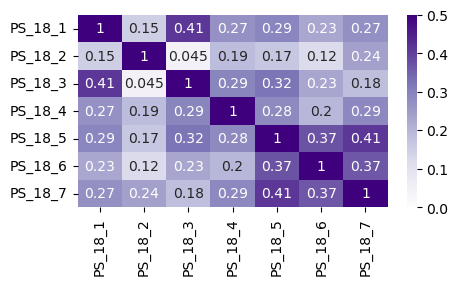

In [63]:
plt.figure(figsize=(5,2.5))
c= PS.corr()
sns.heatmap(c, vmin=0, vmax=0.5, annot=True, cmap="Purples")

In [64]:
PS_1 = sub_data[['PS_18_1', 'PS_18_3', 'PS_18_4', 'PS_18_5', 'PS_18_6', 'PS_18_7']]

<Axes: >

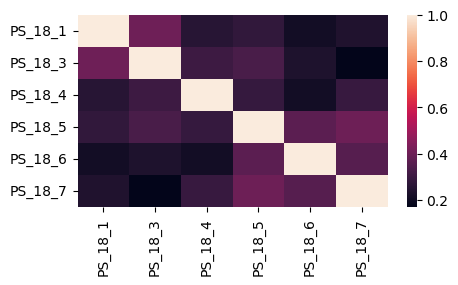

In [65]:
plt.figure(figsize=(5,2.5))
c = PS_1.corr()
sns.heatmap(c)

In [66]:
pg.cronbach_alpha(data=PS_1, nan_policy='listwise')

(0.6931915824221494, array([0.648, 0.734]))

In [67]:
pg.cronbach_alpha(data=PS, nan_policy='listwise')

(0.6893548008085381, array([0.646, 0.729]))

### PS with all variables

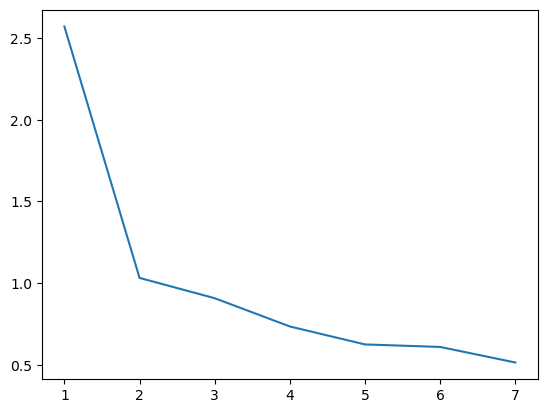

In [68]:
x = PS
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [69]:
fa = FactorAnalyzer(1, method='minres', use_smc=True)
fa.fit(PS)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=PS.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
         Factor 1
PS_18_1 -0.531734
PS_18_2 -0.280752
PS_18_3 -0.498684
PS_18_4 -0.488080
PS_18_5 -0.642982
PS_18_6 -0.511529
PS_18_7 -0.586383


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.28274139, 0.07882159, 0.24868562, 0.23822217, 0.4134254 ,
       0.26166159, 0.34384464])

### PS without PS_18_2 

This is left out based on cronbach alpha level and communalities shown in the factor analysis. 

In [70]:
fa = FactorAnalyzer(1, method='minres', use_smc=True)
fa.fit(PS_1)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=PS_1.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
         Factor 1
PS_18_1 -0.504033
PS_18_3 -0.526554
PS_18_4 -0.489971
PS_18_5 -0.643402
PS_18_6 -0.510794
PS_18_7 -0.546470


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.25404901, 0.27725862, 0.24007132, 0.41396572, 0.26091055,
       0.29862959])

In [71]:
x = PS_1
fa = FactorAnalyzer()
fa.fit(x, 10)

fa.get_eigenvalues()


(array([2.44483887, 0.98055589, 0.76858093, 0.66447972, 0.62238812,
        0.51915647]),
 array([ 1.85811053,  0.55839414,  0.12447059, -0.02871437, -0.09205561,
        -0.11422665]))

In [72]:
fa.fit_transform(x) 

array([[-0.00410067, -0.54397239, -0.49317618],
       [ 1.00253867,  0.95622969,  0.94657023],
       [ 0.02538221, -0.7345506 , -0.3561379 ],
       ...,
       [ 0.96947676,  0.59905501,  0.93151435],
       [ 0.91030517,  0.88154314,  0.78598764],
       [ 0.27694537,  0.87881132,  0.7473444 ]])

In [73]:
PS_scale = (PS['PS_18_1'] + PS['PS_18_2'] + PS['PS_18_3'] + PS['PS_18_4'] + PS['PS_18_5'] + PS['PS_18_6'] + PS['PS_18_7'])/7*100
print(PS_scale)

0      71.428571
1      96.428571
2      67.857143
3      85.714286
4      67.857143
         ...    
490    85.714286
491    85.714286
492    96.428571
493    92.857143
494    92.857143
Length: 495, dtype: float64


In [74]:
sub_data.loc[:,'PS_scale'] = PS_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/4194551214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'PS_scale'] = PS_scale


In [75]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Software engineer,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,1,0,0,0,0.0,1,0,0,71.428571
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,0,0,0,0,1.0,1,0,0,96.428571
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,1,0,0,0,0.0,1,0,0,67.857143
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,1,0,0,0,1.0,1,0,0,85.714286
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,1,0,0,0,0,0.0,0,1,0,67.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,1,0,0,0.0,1,0,0,85.714286
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,1,0,0,0,0.0,1,0,0,85.714286
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,0,0,0,0,0,0.0,0,1,0,96.428571
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,0,0,0,0,0,0.0,0,0,1,92.857143


## 5.2 H3 - Autonomy scale

In [76]:
autonomy_list = list(['Autonomy_24_1', 'Autonomy_24_2', 'Autonomy_24_3', 
                      'Autonomy_24_4', 'Autonomy_24_5', 'Autonomy_24_6'])
autonomy_list2 = list(['Autonomy_24_1', 'Autonomy_24_2', 'Autonomy_24_3', 
                      'Autonomy_24_4', 'Autonomy_24_5'])

In [77]:
autonomy = sub_data[autonomy_list]
autonomy2 = sub_data[autonomy_list2]
autonomy.head()

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6
0,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
1,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Strongly agree
2,Somewhat agree,Neither agree nor disagree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree
3,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree
4,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree


In [78]:
autonomy.loc[:,autonomy_list] = autonomy[autonomy_list].replace(not_reversed_replacer)
autonomy2.loc[:,autonomy_list2] = autonomy[autonomy_list2].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2467021222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autonomy.loc[:,autonomy_list] = autonomy[autonomy_list].replace(not_reversed_replacer)
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2467021222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autonomy2.loc[:,autonomy_list2] = autonomy[autonomy_list2].replace(not_reversed_replacer)


In [79]:
autonomy

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6
0,0.5,0.75,0.75,0.75,0.75,0.5
1,0.75,0.75,0.5,0.75,0.5,1.0
2,0.75,0.5,1.0,0.75,1.0,1.0
3,0.75,0.75,1.0,0.75,1.0,1.0
4,0.75,0.5,0.75,0.75,0.5,0.75
...,...,...,...,...,...,...
490,0.5,0.25,0.75,0.75,0.75,0.75
491,0.75,0.75,0.5,1.0,0.75,0.75
492,1.0,1.0,0.75,1.0,1.0,1.0
493,0.75,0.75,1.0,0.75,0.75,0.75


In [80]:
autonomy = autonomy.astype(float)
autonomy2 = autonomy2.astype(float)

In [81]:
autonomy.corr()

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6
Autonomy_24_1,1.000000,0.648142,0.354402,0.337814,0.383409,0.320903
Autonomy_24_2,0.648142,1.000000,0.355497,0.312711,0.406282,0.281351
Autonomy_24_3,0.354402,0.355497,1.000000,0.292272,0.335696,0.424948
Autonomy_24_4,0.337814,0.312711,0.292272,1.000000,0.340224,0.288618
Autonomy_24_5,0.383409,0.406282,0.335696,0.340224,1.000000,0.426460
Autonomy_24_6,0.320903,0.281351,0.424948,0.288618,0.426460,1.000000


<Axes: >

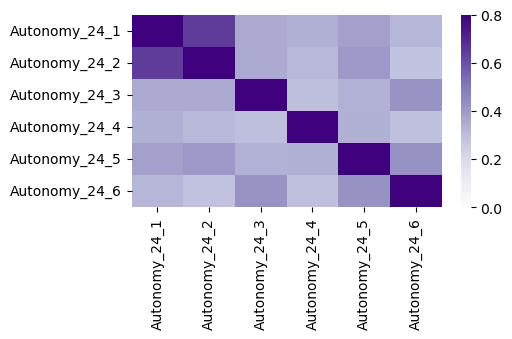

In [82]:
plt.figure(figsize=(5,2.5))
autofig = autonomy.corr()
sns.heatmap(autofig, vmin=0.0, vmax=0.8, cmap='Purples')

<Axes: >

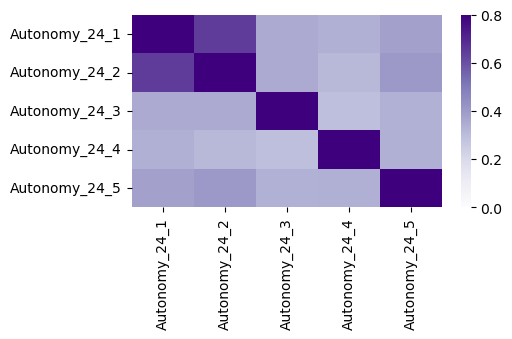

In [83]:
plt.figure(figsize=(5,2.5))
autofig = autonomy2.corr()
sns.heatmap(autofig, vmin=0.0, vmax=0.8, cmap='Purples')

In [84]:
pg.cronbach_alpha(data=autonomy, nan_policy='listwise')

(0.7696287172861452, array([0.736, 0.801]))

In [85]:
pg.cronbach_alpha(data=autonomy2, nan_policy='listwise')

(0.7406893298726934, array([0.702, 0.776]))

In [86]:
print(np.std(autonomy))

Autonomy_24_1    0.191639
Autonomy_24_2    0.205897
Autonomy_24_3    0.269058
Autonomy_24_4    0.204225
Autonomy_24_5    0.214775
Autonomy_24_6    0.253352
dtype: float64


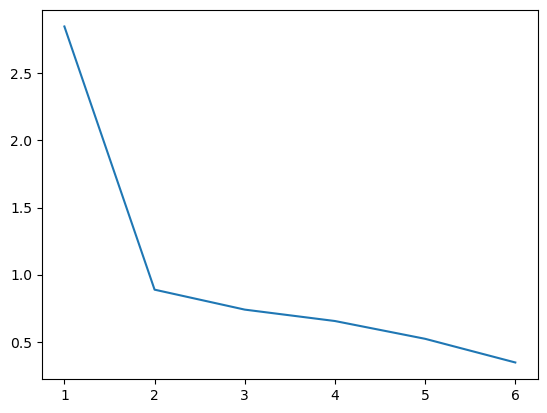

In [87]:
x = autonomy
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [88]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(autonomy)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=autonomy.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
               Factor 1
Autonomy_24_1 -0.709580
Autonomy_24_2 -0.695665
Autonomy_24_3 -0.565178
Autonomy_24_4 -0.497496
Autonomy_24_5 -0.617957
Autonomy_24_6 -0.552988


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.50350377, 0.4839499 , 0.31942615, 0.24750266, 0.38187135,
       0.3057952 ])

In [89]:
autonomy_scale = ((autonomy['Autonomy_24_1'] + autonomy['Autonomy_24_2'] + autonomy['Autonomy_24_3'] + 
                    autonomy['Autonomy_24_4'] + autonomy['Autonomy_24_5'] + autonomy['Autonomy_24_6'])/6)*100

In [90]:
sub_data.loc[:,'Autonomy_scale'] = autonomy_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2188396878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Autonomy_scale'] = autonomy_scale


In [91]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,1,0,0,0,0.0,1,0,0,71.428571,66.666667
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,0,0,0,1.0,1,0,0,96.428571,70.833333
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,1,0,0,0,0.0,1,0,0,67.857143,83.333333
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,1,0,0,0,1.0,1,0,0,85.714286,87.500000
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,0,0,0,0.0,0,1,0,67.857143,66.666667


## 5.3 H5 - Openness in communication scale

In [92]:
openness_list = list(['Openness_29_1', 'Openness_29_2', 'Openness_29_3', 'Openness_29_4', 'Openness_29_5', 
                      'SpeakingUp_30_1', 'SpeakingUp_30_2', 'SpeakingUp_30_3', 'SpeakingUp_30_4'])

In [93]:
openness = sub_data[openness_list]

In [94]:
openness.head()

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
0,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
2,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,​​​​​​​Somewhat disagree,Neither agree nor disagree,​​​​​​​Somewhat disagree,Neither agree nor disagree
3,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree
4,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree


In [95]:
openness.loc[:,openness_list] = openness[openness_list].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2281287477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openness.loc[:,openness_list] = openness[openness_list].replace(not_reversed_replacer)


In [96]:
openness.head()

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
0,0.75,0.75,0.75,0.75,0.75,0.5,0.75,0.75,0.75
1,1.0,1.0,1.0,1.0,1.0,1,1,1,1
2,0.5,0.5,0.75,0.75,0.5,​​​​​​​Somewhat disagree,0.5,​​​​​​​Somewhat disagree,0.5
3,0.75,1.0,1.0,1.0,1.0,0.75,0.75,1,1
4,0.75,0.5,0.5,0.25,0.25,1,1,1,1


In [97]:
openness['SpeakingUp_30_3'].value_counts()

0.75                        211
1                           204
0.5                          30
​​​​​​​Somewhat disagree     17
0                             6
Name: SpeakingUp_30_3, dtype: int64

In [98]:
new_replacer = {'​​​​​​​Somewhat disagree' : 0.25}

In [99]:
openness.loc[:,openness_list] = openness[openness_list].replace(new_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2138956609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openness.loc[:,openness_list] = openness[openness_list].replace(new_replacer)


In [100]:
openness

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
0,0.75,0.75,0.75,0.75,0.75,0.5,0.75,0.75,0.75
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.5,0.5,0.75,0.75,0.5,0.25,0.5,0.25,0.5
3,0.75,1.0,1.0,1.0,1.0,0.75,0.75,1.0,1.0
4,0.75,0.5,0.5,0.25,0.25,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
490,0.75,0.75,0.75,0.5,0.75,0.75,0.5,0.75,0.75
491,0.75,1.0,1.0,1.0,0.25,0.75,0.75,1.0,1.0
492,1.0,1.0,1.0,1.0,1.0,0.75,1.0,1.0,0.75
493,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [101]:
openness = openness.astype(float)

In [102]:
openness.corr()

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
Openness_29_1,1.000000,0.590875,0.497010,0.454031,0.496567,0.292154,0.301283,0.329329,0.307243
Openness_29_2,0.590875,1.000000,0.500881,0.403067,0.445168,0.433542,0.423645,0.441021,0.457856
Openness_29_3,0.497010,0.500881,1.000000,0.524386,0.471044,0.235473,0.201728,0.219736,0.230909
Openness_29_4,0.454031,0.403067,0.524386,1.000000,0.639411,0.205654,0.227422,0.175302,0.228825
Openness_29_5,0.496567,0.445168,0.471044,0.639411,1.000000,0.244377,0.264468,0.272971,0.225516
SpeakingUp_30_1,0.292154,0.433542,0.235473,0.205654,0.244377,1.000000,0.654277,0.542244,0.521260
SpeakingUp_30_2,0.301283,0.423645,0.201728,0.227422,0.264468,0.654277,1.000000,0.671918,0.585975
SpeakingUp_30_3,0.329329,0.441021,0.219736,0.175302,0.272971,0.542244,0.671918,1.000000,0.650639
SpeakingUp_30_4,0.307243,0.457856,0.230909,0.228825,0.225516,0.521260,0.585975,0.650639,1.000000


<Axes: >

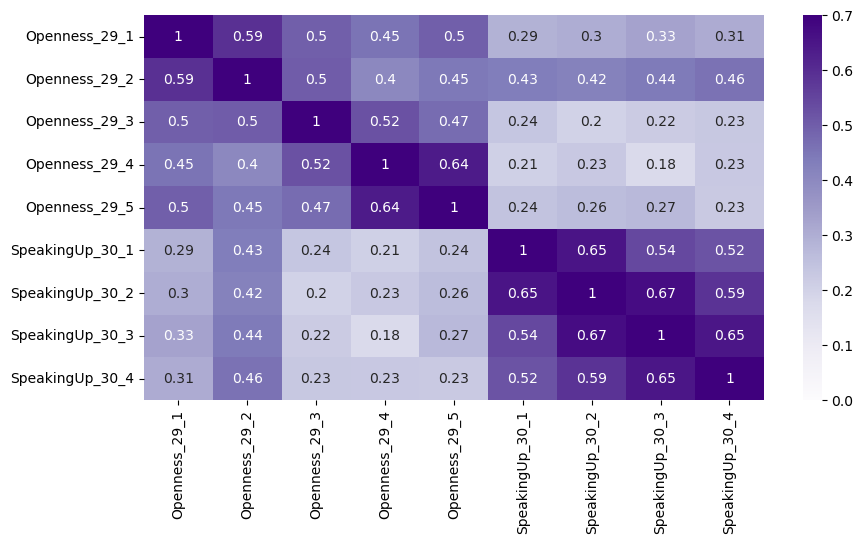

In [103]:
plt.figure(figsize=(10,5))
c = openness.corr()
sns.heatmap(c, vmin=0, vmax=0.7, annot=True, cmap="Purples")

In [104]:
pg.cronbach_alpha(data=openness, nan_policy='listwise')

(0.8564225619149186, array([0.836, 0.875]))

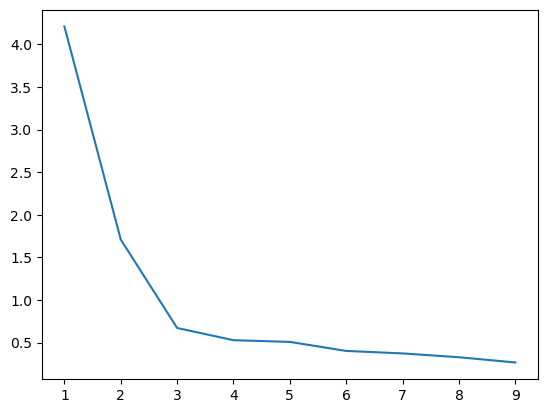

In [105]:
x = openness
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [106]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(openness)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=openness.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1
Openness_29_1   -0.639433
Openness_29_2   -0.743544
Openness_29_3   -0.551132
Openness_29_4   -0.540484
Openness_29_5   -0.583295
SpeakingUp_30_1 -0.631314
SpeakingUp_30_2 -0.675500
SpeakingUp_30_3 -0.671702
SpeakingUp_30_4 -0.649625


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.40887397, 0.5528584 , 0.30374638, 0.29212328, 0.34023259,
       0.39855718, 0.45629997, 0.45118344, 0.4220129 ])

In [107]:
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(openness)

FactorAnalyzer(bounds=(0.00, 2), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=openness.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1  Factor 2
Openness_29_1    0.269797  0.652627
Openness_29_2    0.450255  0.581759
Openness_29_3    0.139888  0.683807
Openness_29_4    0.090902  0.740615
Openness_29_5    0.155319  0.724013
SpeakingUp_30_1  0.697277  0.188355
SpeakingUp_30_2  0.812360  0.158891
SpeakingUp_30_3  0.794455  0.166098
SpeakingUp_30_4  0.723292  0.190996


array([0.49871158, 0.54117303, 0.48716074, 0.55677448, 0.54831822,
       0.52167274, 0.68517505, 0.65874741, 0.55963136])

In [108]:
openness_scale = (openness['Openness_29_1'] + openness['Openness_29_2'] + openness['Openness_29_3'] + openness['Openness_29_4'] + openness['Openness_29_5'] + 
                  openness['SpeakingUp_30_1'] + openness['SpeakingUp_30_2'] +  openness['SpeakingUp_30_3'] + openness['SpeakingUp_30_4'])/9*100

In [109]:
openness_scale

0       72.222222
1      100.000000
2       50.000000
3       91.666667
4       69.444444
          ...    
490     69.444444
491     83.333333
492     94.444444
493    100.000000
494     86.111111
Length: 468, dtype: float64

In [110]:
sub_data.loc[:,'Openness_scale'] = openness_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/745284933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Openness_scale'] = openness_scale


## 5.4 H6 - Management scale

In [111]:
Management_list = list(['Leadership_19_1', 'Leadership_19_2', 'Leadership_19_3', 
                      'Leadership_20_1', 'Leadership_20_2', 'Leadership_20_3', 
                      'Leadership_21_1', 'Leadership_21_2', 'Leadership_21_3', 'Leadership_21_4', 
                      'Leadership_22_1', 'Leadership_22_2', 'Leadership_22_3', 'Leadership_22_4', 'Leadership_22_5'])

In [112]:
Management = sub_data[Management_list]

In [113]:
Management.head()

,Leadership_19_1,Leadership_19_2,Leadership_19_3,Leadership_20_1,Leadership_20_2,Leadership_20_3,Leadership_21_1,Leadership_21_2,Leadership_21_3,Leadership_21_4,Leadership_22_1,Leadership_22_2,Leadership_22_3,Leadership_22_4,Leadership_22_5
0,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
2,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat agree
3,Strongly agree,Somewhat agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree
4,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat disagree,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree


In [114]:
Management.loc[:,Management_list] = Management[Management_list].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/3897499329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Management.loc[:,Management_list] = Management[Management_list].replace(not_reversed_replacer)


In [115]:
Management['Leadership_19_1'].value_counts()

0.75    215
0.50    112
1.00     96
0.25     32
0.00     13
Name: Leadership_19_1, dtype: int64

In [116]:
Management = Management.astype(float)

In [117]:
Management.corr()

,Leadership_19_1,Leadership_19_2,Leadership_19_3,Leadership_20_1,Leadership_20_2,Leadership_20_3,Leadership_21_1,Leadership_21_2,Leadership_21_3,Leadership_21_4,Leadership_22_1,Leadership_22_2,Leadership_22_3,Leadership_22_4,Leadership_22_5
Leadership_19_1,1.000000,0.491417,0.441889,0.604996,0.639225,0.483925,0.592993,0.492653,0.409253,0.516021,0.462065,0.615082,0.661586,0.516196,0.472372
Leadership_19_2,0.491417,1.000000,0.571450,0.449733,0.392689,0.417999,0.353150,0.376454,0.312841,0.443109,0.517900,0.383401,0.379367,0.496337,0.395466
Leadership_19_3,0.441889,0.571450,1.000000,0.530428,0.553473,0.571834,0.486599,0.476678,0.465439,0.543012,0.481754,0.438067,0.416140,0.481035,0.523283
Leadership_20_1,0.604996,0.449733,0.530428,1.000000,0.752453,0.711391,0.729389,0.623289,0.513264,0.659862,0.600066,0.658683,0.632216,0.647373,0.620677
Leadership_20_2,0.639225,0.392689,0.553473,0.752453,1.000000,0.707274,0.681254,0.615567,0.549189,0.658676,0.565036,0.620256,0.599665,0.604457,0.576185
Leadership_20_3,0.483925,0.417999,0.571834,0.711391,0.707274,1.000000,0.598386,0.517214,0.533243,0.619478,0.561538,0.539791,0.497551,0.525088,0.574369
Leadership_21_1,0.592993,0.353150,0.486599,0.729389,0.681254,0.598386,1.000000,0.691468,0.608119,0.761838,0.579257,0.633868,0.646704,0.613873,0.636846
Leadership_21_2,0.492653,0.376454,0.476678,0.623289,0.615567,0.517214,0.691468,1.000000,0.579548,0.660942,0.478730,0.553988,0.535096,0.588166,0.584509
Leadership_21_3,0.409253,0.312841,0.465439,0.513264,0.549189,0.533243,0.608119,0.579548,1.000000,0.690129,0.414454,0.475058,0.493577,0.451329,0.535827
Leadership_21_4,0.516021,0.443109,0.543012,0.659862,0.658676,0.619478,0.761838,0.660942,0.690129,1.000000,0.561780,0.587068,0.584317,0.569870,0.622202


<Axes: >

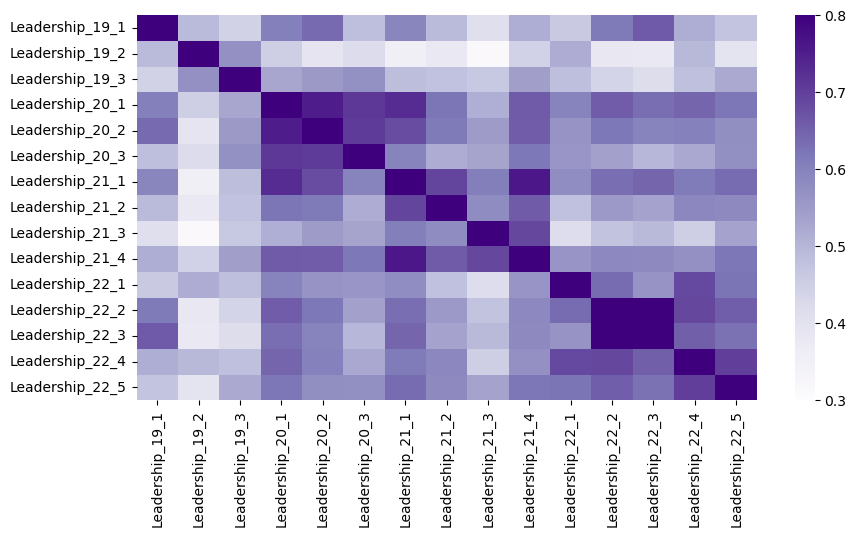

In [118]:
plt.figure(figsize=(10,5))
c = Management.corr()
sns.heatmap(c, vmin=0.3, vmax=0.8, cmap='Purples')

In [119]:
pg.cronbach_alpha(data=Management, nan_policy='listwise')

(0.94999177535615, array([0.943, 0.956]))

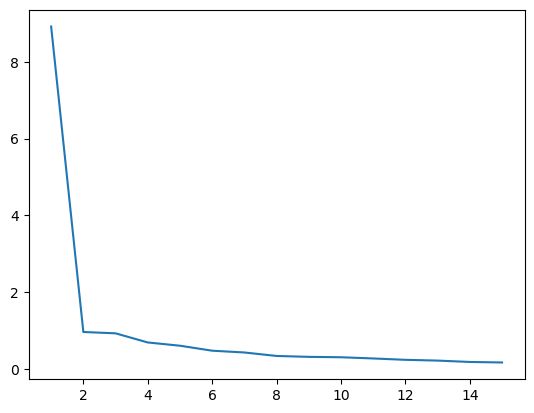

In [120]:
x = Management
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [121]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(Management)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=Management.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1
Leadership_19_1  0.701171
Leadership_19_2  0.554685
Leadership_19_3  0.652479
Leadership_20_1  0.841186
Leadership_20_2  0.817777
Leadership_20_3  0.748431
Leadership_21_1  0.830775
Leadership_21_2  0.741759
Leadership_21_3  0.666838
Leadership_21_4  0.811321
Leadership_22_1  0.734732
Leadership_22_2  0.797585
Leadership_22_3  0.777303
Leadership_22_4  0.785913
Leadership_22_5  0.779746


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.49164104, 0.30767595, 0.42572831, 0.70759351, 0.66875883,
       0.56014919, 0.69018708, 0.55020618, 0.44467356, 0.65824141,
       0.53983055, 0.63614118, 0.60420055, 0.61765861, 0.60800416])

In [122]:
Management_1 = Management[['Leadership_19_1', 'Leadership_19_3', 
                          'Leadership_20_1', 'Leadership_20_2', 'Leadership_20_3', 
                          'Leadership_21_1', 'Leadership_21_2', 'Leadership_21_3', 'Leadership_21_4', 
                          'Leadership_22_1', 'Leadership_22_2', 'Leadership_22_3', 'Leadership_22_4', 'Leadership_22_5']] 

In [123]:
Management_1

,Leadership_19_1,Leadership_19_3,Leadership_20_1,Leadership_20_2,Leadership_20_3,Leadership_21_1,Leadership_21_2,Leadership_21_3,Leadership_21_4,Leadership_22_1,Leadership_22_2,Leadership_22_3,Leadership_22_4,Leadership_22_5
0,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.75,0.75,0.50,0.50,0.25,0.25
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.75,1.00,1.00,0.75,1.00
2,0.25,1.00,0.75,0.25,0.75,0.75,0.50,0.50,0.75,0.75,0.50,0.50,0.25,0.75
3,1.00,1.00,0.75,1.00,1.00,0.75,0.75,1.00,0.75,0.50,0.75,0.75,0.50,0.75
4,0.75,0.50,0.75,0.75,1.00,0.25,0.25,0.50,0.75,0.25,0.75,0.75,0.50,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.75,1.00,0.75,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.75,0.75,0.75
491,0.50,0.75,0.75,0.50,0.75,0.75,0.75,1.00,0.75,0.25,0.50,0.50,0.25,0.25
492,0.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
493,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [124]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(Management_1)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=Management_1.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1
Leadership_19_1  0.693420
Leadership_19_3  0.636536
Leadership_20_1  0.842501
Leadership_20_2  0.822478
Leadership_20_3  0.747948
Leadership_21_1  0.839674
Leadership_21_2  0.744622
Leadership_21_3  0.671269
Leadership_21_4  0.812027
Leadership_22_1  0.725937
Leadership_22_2  0.802223
Leadership_22_3  0.781432
Leadership_22_4  0.780943
Leadership_22_5  0.782476


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.48083149, 0.40517865, 0.70980822, 0.67647044, 0.55942676,
       0.70505222, 0.55446247, 0.45060274, 0.65938761, 0.52698395,
       0.64356187, 0.61063558, 0.60987253, 0.61226918])

In [125]:
pg.cronbach_alpha(data=Management_1, nan_policy='listwise')

(0.9509232525528363, array([0.944, 0.957]))

Det er minimalt hvad fjernelsen af variable 'leadership_19_2' kan hjælpe med, derfor vælger vi at beholde den for autensiteten af vores data. 

In [126]:
Management_scale = (Management['Leadership_19_1'] + Management['Leadership_19_2'] + Management['Leadership_19_3'] + 
                    Management['Leadership_20_1'] + Management['Leadership_20_2'] + Management['Leadership_20_3'] + 
                    Management['Leadership_21_1'] + Management['Leadership_21_2'] + Management['Leadership_21_3'] + Management['Leadership_21_4'] + 
                    Management['Leadership_22_1'] + Management['Leadership_22_2'] + Management['Leadership_22_3'] + Management['Leadership_22_4'] + Management['Leadership_22_5'])/15*100

In [127]:
sub_data.loc[:,'Management_scale'] = Management_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2293308630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Management_scale'] = Management_scale


In [128]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,QA,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale,Openness_scale,Management_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0,0.0,1,0,0,71.428571,66.666667,72.222222,56.666667
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,0,1.0,1,0,0,96.428571,70.833333,100.000000,96.666667
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0.0,1,0,0,67.857143,83.333333,50.000000,60.000000
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,0,1.0,1,0,0,85.714286,87.500000,91.666667,80.000000
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,0,0.0,0,1,0,67.857143,66.666667,69.444444,60.000000


## 5.5 H8 - Clear decision process scale

In [129]:
ClearDecisions_list = list(['Autonomy_24_1', 'Autonomy_24_2', 'Autonomy_24_3', 'Autonomy_24_4', 'Autonomy_24_5', 'Autonomy_24_6',
                       'DecisionMaking_25_1', 'DecisionMaking_25_2', 'DecisionMaking_25_3', 'DecisionMaking_25_4' ])

In [130]:
ClearDecisions = sub_data[ClearDecisions_list]

In [131]:
ClearDecisions = ClearDecisions.replace(not_reversed_replacer).astype(float)

In [132]:
ClearDecisions.corr()

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6,DecisionMaking_25_1,DecisionMaking_25_2,DecisionMaking_25_3,DecisionMaking_25_4
Autonomy_24_1,1.000000,0.648142,0.354402,0.337814,0.383409,0.320903,0.282926,0.242294,0.275104,0.269857
Autonomy_24_2,0.648142,1.000000,0.355497,0.312711,0.406282,0.281351,0.328980,0.287247,0.266652,0.272455
Autonomy_24_3,0.354402,0.355497,1.000000,0.292272,0.335696,0.424948,0.234068,0.225494,0.236577,0.264795
Autonomy_24_4,0.337814,0.312711,0.292272,1.000000,0.340224,0.288618,0.320100,0.171944,0.171118,0.182423
Autonomy_24_5,0.383409,0.406282,0.335696,0.340224,1.000000,0.426460,0.372487,0.317994,0.301807,0.307716
Autonomy_24_6,0.320903,0.281351,0.424948,0.288618,0.426460,1.000000,0.271688,0.201643,0.218818,0.183492
DecisionMaking_25_1,0.282926,0.328980,0.234068,0.320100,0.372487,0.271688,1.000000,0.545257,0.468320,0.458539
DecisionMaking_25_2,0.242294,0.287247,0.225494,0.171944,0.317994,0.201643,0.545257,1.000000,0.626746,0.594575
DecisionMaking_25_3,0.275104,0.266652,0.236577,0.171118,0.301807,0.218818,0.468320,0.626746,1.000000,0.527380
DecisionMaking_25_4,0.269857,0.272455,0.264795,0.182423,0.307716,0.183492,0.458539,0.594575,0.527380,1.000000


<Axes: >

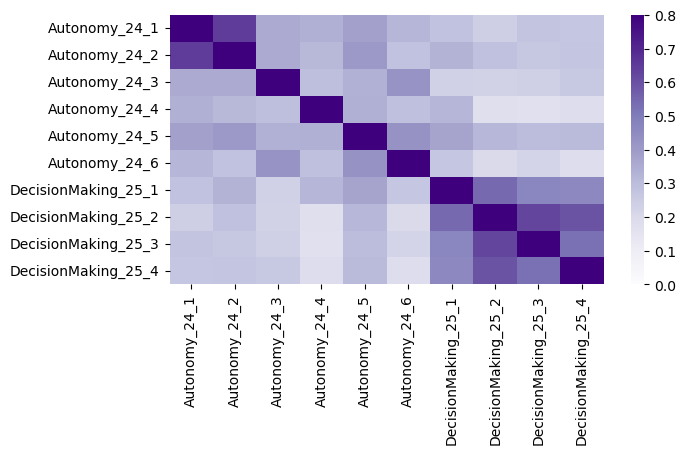

In [133]:
plt.figure(figsize=(7,3.5))
c = ClearDecisions.corr()
sns.heatmap(c, vmin=0, vmax=0.8, cmap='Purples')

In [134]:
pg.cronbach_alpha(data=ClearDecisions, nan_policy='listwise')

(0.8258324671008433, array([0.801, 0.848]))

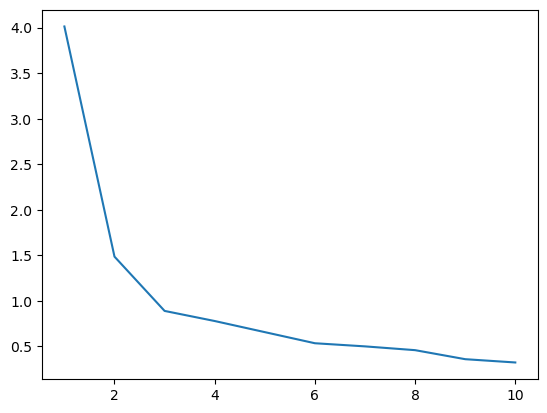

In [135]:
x = ClearDecisions
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [136]:
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearDecisions)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=ClearDecisions.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                     Factor 1  Factor 2
Autonomy_24_1        0.692214  0.161542
Autonomy_24_2        0.669494  0.196297
Autonomy_24_3        0.531144  0.177100
Autonomy_24_4        0.484744  0.141702
Autonomy_24_5        0.564179  0.283177
Autonomy_24_6        0.525753  0.153245
DecisionMaking_25_1  0.328915  0.582120
DecisionMaking_25_2  0.149745  0.842225
DecisionMaking_25_3  0.198542  0.707329
DecisionMaking_25_4  0.212209  0.673794


array([0.50525554, 0.48675445, 0.31347786, 0.25505585, 0.39848744,
       0.29990006, 0.44704873, 0.73176701, 0.53973316, 0.49903075])

In [137]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearDecisions)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=ClearDecisions.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                     Factor 1
Autonomy_24_1       -0.592474
Autonomy_24_2       -0.605831
Autonomy_24_3       -0.505160
Autonomy_24_4       -0.448536
Autonomy_24_5       -0.608427
Autonomy_24_6       -0.484654
DecisionMaking_25_1 -0.647250
DecisionMaking_25_2 -0.644668
DecisionMaking_25_3 -0.616072
DecisionMaking_25_4 -0.608531


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.35102591, 0.36703124, 0.25518705, 0.20118453, 0.37018317,
       0.23488948, 0.41893268, 0.41559717, 0.37954515, 0.37030967])

In [138]:
ClearDecisions_scale = (ClearDecisions['Autonomy_24_1'] + ClearDecisions['Autonomy_24_2'] + ClearDecisions['Autonomy_24_3'] + ClearDecisions['Autonomy_24_4'] + ClearDecisions['Autonomy_24_5'] + ClearDecisions['Autonomy_24_6'] +
                        ClearDecisions['DecisionMaking_25_1'] + ClearDecisions['DecisionMaking_25_2'] + ClearDecisions['DecisionMaking_25_3'] + ClearDecisions['DecisionMaking_25_4'])/10*100

In [139]:
ClearDecisions_scale.value_counts()

90.0     44
77.5     37
75.0     35
82.5     33
65.0     32
80.0     30
87.5     30
72.5     30
67.5     29
70.0     29
85.0     24
95.0     19
92.5     19
62.5     16
97.5     11
100.0     9
55.0      7
52.5      7
57.5      6
60.0      6
47.5      4
50.0      2
35.0      2
42.5      2
45.0      1
17.5      1
32.5      1
22.5      1
2.5       1
dtype: int64

In [140]:
sub_data.loc[:,'ClearDecisions_scale'] = ClearDecisions_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/1219179718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'ClearDecisions_scale'] = ClearDecisions_scale


In [141]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale,Openness_scale,Management_scale,ClearDecisions_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0.0,1,0,0,71.428571,66.666667,72.222222,56.666667,67.5
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,1.0,1,0,0,96.428571,70.833333,100.000000,96.666667,82.5
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0.0,1,0,0,67.857143,83.333333,50.000000,60.000000,80.0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,1.0,1,0,0,85.714286,87.500000,91.666667,80.000000,90.0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,0.0,0,1,0,67.857143,66.666667,69.444444,60.000000,57.5


## 5.6 H9 - Clear feedback scale

In [142]:
ClearFeedback_list = list(['NoBlame_28_1', 'NoBlame_28_2', 'NoBlame_28_3', 
                     'LearningMistakes_33_1', 'LearningMistakes_33_2', 'LearningMistakes_33_3'])

In [143]:
ClearFeedback = sub_data[ClearFeedback_list]

In [144]:
ClearFeedback = ClearFeedback.replace(not_reversed_replacer)

In [145]:
ClearFeedback = ClearFeedback.astype(float)

In [146]:
ClearFeedback.corr()

,NoBlame_28_1,NoBlame_28_2,NoBlame_28_3,LearningMistakes_33_1,LearningMistakes_33_2,LearningMistakes_33_3
NoBlame_28_1,1.000000,0.852544,0.542705,0.429898,0.215890,0.332460
NoBlame_28_2,0.852544,1.000000,0.545836,0.457347,0.268811,0.330333
NoBlame_28_3,0.542705,0.545836,1.000000,0.438631,0.230792,0.319692
LearningMistakes_33_1,0.429898,0.457347,0.438631,1.000000,0.447149,0.597916
LearningMistakes_33_2,0.215890,0.268811,0.230792,0.447149,1.000000,0.612002
LearningMistakes_33_3,0.332460,0.330333,0.319692,0.597916,0.612002,1.000000


<Axes: >

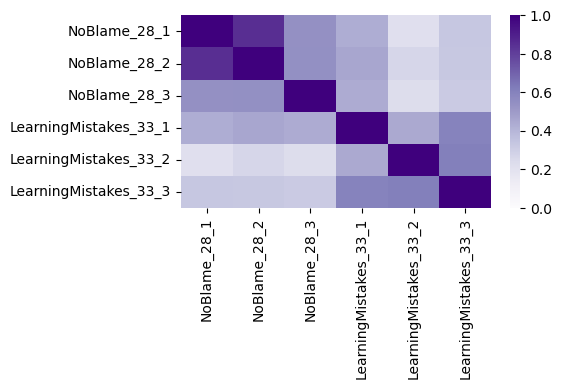

In [147]:
plt.figure(figsize=(5,2.5))
c = ClearFeedback.corr()
sns.heatmap(c, vmin=0, vmax=1, cmap='Purples')

In [148]:
pg.cronbach_alpha(data=ClearFeedback, nan_policy='listwise')

(0.820216957105965, array([0.794, 0.844]))

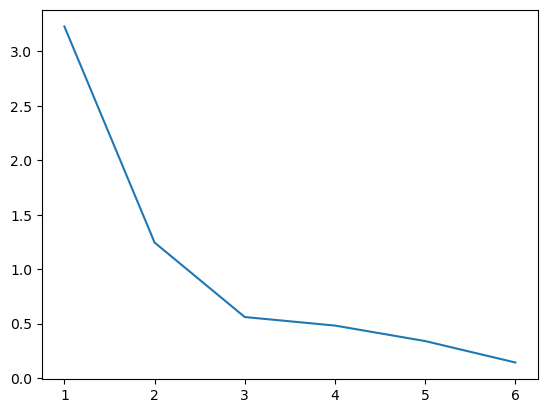

In [149]:
x = ClearFeedback
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [150]:
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearFeedback)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=ClearFeedback.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                       Factor 1  Factor 2
NoBlame_28_1           0.900857  0.168514
NoBlame_28_2           0.897695  0.200518
NoBlame_28_3           0.558815  0.272832
LearningMistakes_33_1  0.386149  0.611166
LearningMistakes_33_2  0.124224  0.667578
LearningMistakes_33_3  0.183079  0.869255


array([0.83994093, 0.8460634 , 0.38671174, 0.52263547, 0.46109126,
       0.78912194])

In [151]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearFeedback)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=ClearFeedback.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                       Factor 1
NoBlame_28_1          -0.764295
NoBlame_28_2          -0.790409
NoBlame_28_3          -0.631893
LearningMistakes_33_1 -0.698085
LearningMistakes_33_2 -0.489880
LearningMistakes_33_3 -0.614181


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.58414704, 0.62474641, 0.39928831, 0.48732262, 0.23998278,
       0.37721776])

In [152]:
ClearFeedback_2 = ClearFeedback[['NoBlame_28_1', 'NoBlame_28_2', 'NoBlame_28_3', 
                     'LearningMistakes_33_1', 'LearningMistakes_33_3']]

In [153]:
pg.cronbach_alpha(data=ClearFeedback_2, nan_policy='listwise')

(0.82181597173339, array([0.795, 0.846]))

<Axes: >

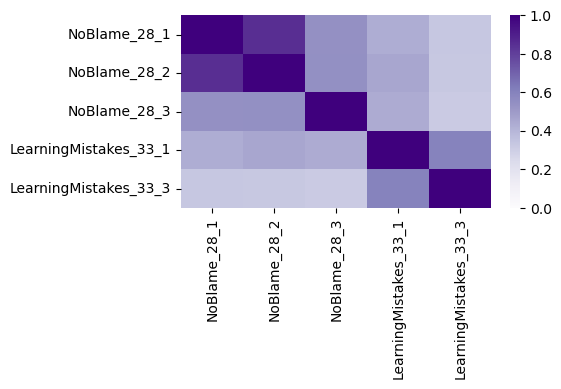

In [154]:
plt.figure(figsize=(5,2.5))
c = ClearFeedback_2.corr()
sns.heatmap(c, vmin=0, vmax=1, cmap='Purples')

In [155]:
ClearFeedback_scale = (ClearFeedback['NoBlame_28_1'] + ClearFeedback['NoBlame_28_2'] + ClearFeedback['NoBlame_28_3'] + 
                       ClearFeedback['LearningMistakes_33_1'] + ClearFeedback['LearningMistakes_33_2'] + ClearFeedback['LearningMistakes_33_3'])/6*100

In [156]:
sub_data.loc[:,'ClearFeedback_scale'] = ClearFeedback_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/863874618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'ClearFeedback_scale'] = ClearFeedback_scale


In [157]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale,Openness_scale,Management_scale,ClearDecisions_scale,ClearFeedback_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0.0,1,0,0,71.428571,66.666667,72.222222,56.666667,67.5,75.000000
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1.0,1,0,0,96.428571,70.833333,100.000000,96.666667,82.5,75.000000
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0.0,1,0,0,67.857143,83.333333,50.000000,60.000000,80.0,50.000000
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,1.0,1,0,0,85.714286,87.500000,91.666667,80.000000,90.0,83.333333
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0.0,0,1,0,67.857143,66.666667,69.444444,60.000000,57.5,75.000000


# 6. Creating dummie variables for X values

## 6.1 Colocated

In [158]:
sub_data['Colocated_16'].value_counts()

Less than 1 day per week    193
1-2 days per week           127
3-4 days per week            78
Always                       70
Name: Colocated_16, dtype: int64

In [159]:
Colocated = pd.get_dummies(sub_data['Colocated_16'])

In [160]:
sub_data.loc[:,('Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always')] = Colocated[['Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/4031959518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always')] = Colocated[['Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/4031959518.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('Less than 1 day per week', '1-2 days per week', '3-4 days per wee

## 6.2 Enduring teams

In [161]:
sub_data['WorkingTogether_14'].value_counts()

1 – 2 years          195
Less than 1 year     108
More than 4 years     89
3 – 4 years           76
Name: WorkingTogether_14, dtype: int64

In [162]:
EnduringTeams = pd.get_dummies(sub_data['WorkingTogether_14'])

In [163]:
EnduringTeams

,1 – 2 years,3 – 4 years,Less than 1 year,More than 4 years
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
490,1,0,0,0
491,1,0,0,0
492,0,0,0,1
493,1,0,0,0


In [164]:
sub_data.loc[:, ('Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years')] = EnduringTeams[['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/815619115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:, ('Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years')] = EnduringTeams[['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/815619115.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, ('Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years')] = Enduri

In [165]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,ClearDecisions_scale,ClearFeedback_scale,Less than 1 day per week,1-2 days per week,3-4 days per week,Always,Less than 1 year,1 – 2 years,3 – 4 years,More than 4 years
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,67.5,75.000000,1,0,0,0,1,0,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,82.5,75.000000,0,1,0,0,0,1,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,80.0,50.000000,0,0,1,0,0,1,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,90.0,83.333333,0,0,1,0,0,1,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,57.5,75.000000,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,67.5,54.166667,1,0,0,0,0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,72.5,66.666667,1,0,0,0,0,1,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,95.0,100.000000,1,0,0,0,0,0,0,1
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,87.5,100.000000,0,0,1,0,0,1,0,0


# 7. Hypothesis - Linear regression

## 7.1 Hypothesis 1 - Colocated

### Baseline model

In [166]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['1-2 days per week', '3-4 days per week', 'Always']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,79.7002,0.9653,82.5613,0.0000,0.0107,0.0044,77.8032,81.5972
1,1-2 days per week,-0.7913,1.5323,-0.5164,0.6058,0.0107,0.0044,-3.8025,2.2199
2,3-4 days per week,-4.0134,1.7994,-2.2305,0.0262,0.0107,0.0044,-7.5493,-0.4775
3,Always,-1.1288,1.8712,-0.6033,0.5466,0.0107,0.0044,-4.8058,2.5482


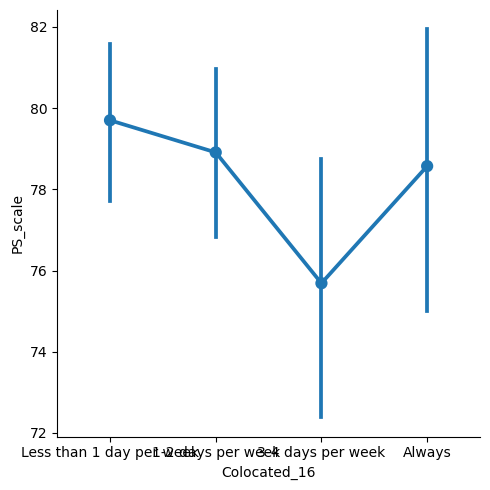

In [167]:
sns.catplot(data=sub_data, x="Colocated_16", y="PS_scale", kind="point")

### Model 1

In [168]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,79.8593,1.4388,55.5045,0.0000,0.0109,0.0002,77.0319,82.6867
1,1-2 days per week,-0.7885,1.5432,-0.5110,0.6096,0.0109,0.0002,-3.8211,2.2440
2,3-4 days per week,-4.0473,1.8163,-2.2283,0.0263,0.0109,0.0002,-7.6164,-0.4781
3,Always,-1.1433,1.8763,-0.6093,0.5426,0.0109,0.0002,-4.8304,2.5438
4,Gender,0.2789,1.5895,0.1754,0.8608,0.0109,0.0002,-2.8447,3.4024
5,TeamSize,-0.0260,0.1365,-0.1903,0.8491,0.0109,0.0002,-0.2942,0.2423


### Model 2

In [169]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize', 'Outsourced', 'Mixed']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,81.0684,1.4729,55.0384,0.0000,0.0337,0.019,78.1738,83.9629
1,1-2 days per week,-1.0499,1.5316,-0.6855,0.4934,0.0337,0.019,-4.0597,1.9599
2,3-4 days per week,-4.1506,1.8009,-2.3047,0.0216,0.0337,0.019,-7.6897,-0.6116
3,Always,-0.7868,1.8617,-0.4226,0.6728,0.0337,0.019,-4.4453,2.8716
4,Gender,0.1086,1.5754,0.0689,0.9451,0.0337,0.019,-2.9874,3.2045
5,TeamSize,0.0217,0.1360,0.1594,0.8734,0.0337,0.019,-0.2456,0.2889
6,Outsourced,-4.2280,1.4288,-2.9591,0.0032,0.0337,0.019,-7.0358,-1.4201
7,Mixed,-4.4453,2.2242,-1.9986,0.0462,0.0337,0.019,-8.8162,-0.0744


### Model 3

In [170]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,75.8156,2.0340,37.2745,0.0000,0.0783,0.056,71.8185,79.8127
1,1-2 days per week,-0.9812,1.5126,-0.6487,0.5169,0.0783,0.056,-3.9538,1.9914
2,3-4 days per week,-3.9293,1.7888,-2.1966,0.0286,0.0783,0.056,-7.4447,-0.4139
3,Always,0.0709,1.8442,0.0384,0.9694,0.0783,0.056,-3.5534,3.6951
4,Gender,0.5425,1.5588,0.3480,0.7280,0.0783,0.056,-2.5208,3.6059
5,TeamSize,0.0085,0.1347,0.0632,0.9496,0.0783,0.056,-0.2563,0.2733
6,Outsourced,-3.4305,1.4161,-2.4226,0.0158,0.0783,0.056,-6.2133,-0.6477
7,Mixed,-4.3052,2.1906,-1.9653,0.0500,0.0783,0.056,-8.6101,-0.0003
8,3 - 5 years,3.3774,1.8267,1.8489,0.0651,0.0783,0.056,-0.2123,6.9672
9,6 - 8 years,7.6110,2.0479,3.7165,0.0002,0.0783,0.056,3.5865,11.6356


### Model 4

In [171]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,73.5611,2.6277,27.9949,0.0000,0.0963,0.0643,68.3971,78.7251
1,1-2 days per week,-1.3547,1.5126,-0.8956,0.3709,0.0963,0.0643,-4.3274,1.6179
2,3-4 days per week,-4.1048,1.7900,-2.2932,0.0223,0.0963,0.0643,-7.6227,-0.5870
3,Always,0.1670,1.8490,0.0903,0.9281,0.0963,0.0643,-3.4668,3.8008
4,Gender,0.5136,1.5708,0.3270,0.7438,0.0963,0.0643,-2.5733,3.6005
5,TeamSize,0.0824,0.1405,0.5866,0.5578,0.0963,0.0643,-0.1937,0.3585
6,Outsourced,-3.1244,1.4232,-2.1954,0.0286,0.0963,0.0643,-5.9213,-0.3275
7,Mixed,-4.0320,2.1931,-1.8384,0.0667,0.0963,0.0643,-8.3420,0.2781
8,3 - 5 years,3.2426,1.8318,1.7701,0.0774,0.0963,0.0643,-0.3574,6.8426
9,6 - 8 years,6.9968,2.0609,3.3949,0.0007,0.0963,0.0643,2.9466,11.0471


### Model 5

In [172]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,73.5150,2.7256,26.9718,0.0000,0.0963,0.0622,68.1584,78.8715
1,1-2 days per week,-1.3567,1.5146,-0.8957,0.3709,0.0963,0.0622,-4.3333,1.6199
2,3-4 days per week,-4.0960,1.7972,-2.2791,0.0231,0.0963,0.0622,-7.6280,-0.5640
3,Always,0.1578,1.8565,0.0850,0.9323,0.0963,0.0622,-3.4907,3.8063
4,Gender,0.5202,1.5759,0.3301,0.7415,0.0963,0.0622,-2.5767,3.6172
5,TeamSize,0.0815,0.1414,0.5766,0.5645,0.0963,0.0622,-0.1963,0.3593
6,Outsourced,-3.1103,1.4414,-2.1579,0.0315,0.0963,0.0622,-5.9430,-0.2777
7,Mixed,-4.0244,2.1987,-1.8304,0.0679,0.0963,0.0622,-8.3454,0.2966
8,3 - 5 years,3.2461,1.8347,1.7693,0.0775,0.0963,0.0622,-0.3595,6.8517
9,6 - 8 years,6.9953,2.0634,3.3903,0.0008,0.0963,0.0622,2.9403,11.0504


## 7.2 Hypothesis 2 - Enduring teams

### Baseline model

In [173]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,77.5463,1.2875,60.2314,0.0000,0.0153,0.009,75.0163,80.0763
1,1 – 2 years,0.7321,1.6049,0.4562,0.6485,0.0153,0.009,-2.4216,3.8858
2,3 – 4 years,-0.2907,2.0033,-0.1451,0.8847,0.0153,0.009,-4.2273,3.6460
3,More than 4 years,4.4360,1.9155,2.3159,0.0210,0.0153,0.009,0.6720,8.2001


In [174]:
sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].astype('category')

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2166970438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].astype('category')


In [175]:
sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].cat.set_categories(['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years'], ordered=True)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_77352/2947802214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].cat.set_categories(['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years'], ordered=True)


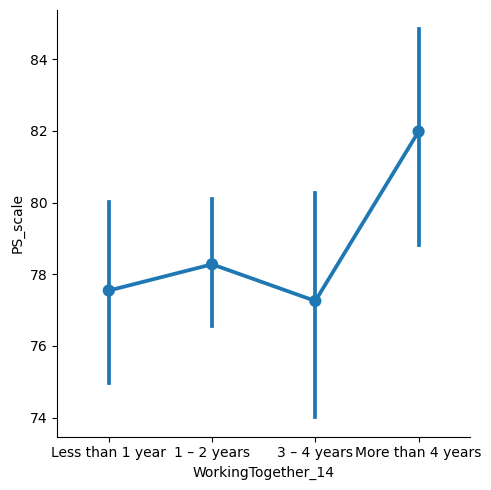

In [176]:
sns.catplot(data=sub_data, x="WorkingTogether_14", y="PS_scale", kind="point")

### Model 1

In [177]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,77.9582,1.6345,47.6961,0.0000,0.0157,0.0051,74.7463,81.1701
1,1 – 2 years,0.7611,1.6097,0.4728,0.6365,0.0157,0.0051,-2.4021,3.9244
2,3 – 4 years,-0.1836,2.0312,-0.0904,0.9280,0.0157,0.0051,-4.1752,3.8080
3,More than 4 years,4.5317,1.9353,2.3416,0.0196,0.0157,0.0051,0.7286,8.3347
4,Gender,-0.1465,1.5766,-0.0929,0.9260,0.0157,0.0051,-3.2447,2.9518
5,TeamSize,-0.0545,0.1379,-0.3952,0.6928,0.0157,0.0051,-0.3255,0.2165


### Model 2

In [178]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize', 'Outsourced', 'Mixed']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,79.0163,1.6605,47.5866,0.0000,0.0376,0.0229,75.7532,82.2794
1,1 – 2 years,0.9221,1.6035,0.5751,0.5655,0.0376,0.0229,-2.2290,4.0732
2,3 – 4 years,0.0596,2.0245,0.0294,0.9765,0.0376,0.0229,-3.9187,4.0380
3,More than 4 years,4.5864,1.9224,2.3857,0.0174,0.0376,0.0229,0.8086,8.3643
4,Gender,-0.3206,1.5637,-0.2050,0.8377,0.0376,0.0229,-3.3935,2.7524
5,TeamSize,-0.0120,0.1373,-0.0871,0.9306,0.0376,0.0229,-0.2818,0.2578
6,Outsourced,-4.0269,1.4191,-2.8377,0.0047,0.0376,0.0229,-6.8156,-1.2382
7,Mixed,-4.5977,2.2318,-2.0601,0.0400,0.0376,0.0229,-8.9834,-0.2120


### Model 3

In [179]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,74.6282,2.1449,34.7938,0.0000,0.075,0.0526,70.4132,78.8433
1,1 – 2 years,0.8517,1.5833,0.5380,0.5909,0.075,0.0526,-2.2596,3.9631
2,3 – 4 years,-1.4353,2.0311,-0.7066,0.4802,0.075,0.0526,-5.4268,2.5563
3,More than 4 years,2.3410,1.9982,1.1716,0.2420,0.075,0.0526,-1.5858,6.2678
4,Gender,0.0627,1.5538,0.0403,0.9678,0.075,0.0526,-2.9908,3.1161
5,TeamSize,0.0071,0.1361,0.0520,0.9586,0.075,0.0526,-0.2604,0.2745
6,Outsourced,-3.2373,1.4131,-2.2910,0.0224,0.075,0.0526,-6.0142,-0.4604
7,Mixed,-4.2763,2.2075,-1.9372,0.0533,0.075,0.0526,-8.6145,0.0618
8,3 - 5 years,3.1477,1.8182,1.7312,0.0841,0.075,0.0526,-0.4254,6.7208
9,6 - 8 years,7.2577,2.0592,3.5245,0.0005,0.075,0.0526,3.2110,11.3045


### Model 4

In [180]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,72.4041,2.6609,27.2105,0.0000,0.0954,0.0633,67.1748,77.6333
1,1 – 2 years,1.1055,1.5921,0.6943,0.4878,0.0954,0.0633,-2.0234,4.2344
2,3 – 4 years,-1.2562,2.0298,-0.6189,0.5363,0.0954,0.0633,-5.2452,2.7328
3,More than 4 years,3.3371,2.0156,1.6556,0.0985,0.0954,0.0633,-0.6240,7.2981
4,Gender,0.0722,1.5654,0.0461,0.9632,0.0954,0.0633,-3.0041,3.1486
5,TeamSize,0.0803,0.1415,0.5672,0.5708,0.0954,0.0633,-0.1979,0.3585
6,Outsourced,-2.9119,1.4201,-2.0505,0.0409,0.0954,0.0633,-5.7026,-0.1211
7,Mixed,-4.0238,2.2069,-1.8232,0.0689,0.0954,0.0633,-8.3609,0.3134
8,3 - 5 years,2.8778,1.8196,1.5816,0.1144,0.0954,0.0633,-0.6980,6.4537
9,6 - 8 years,6.4279,2.0714,3.1032,0.0020,0.0954,0.0633,2.3571,10.4987


### Model 5

In [181]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,71.9763,2.7783,25.9066,0.0000,0.096,0.0618,66.5162,77.4363
1,1 – 2 years,1.1442,1.5950,0.7174,0.4735,0.096,0.0618,-1.9903,4.2788
2,3 – 4 years,-1.3170,2.0345,-0.6473,0.5178,0.096,0.0618,-5.3153,2.6813
3,More than 4 years,3.3844,2.0191,1.6762,0.0944,0.096,0.0618,-0.5835,7.3523
4,Gender,0.1308,1.5704,0.0833,0.9337,0.096,0.0618,-2.9554,3.2169
5,TeamSize,0.0733,0.1422,0.5155,0.6065,0.096,0.0618,-0.2062,0.3529
6,Outsourced,-2.7971,1.4370,-1.9465,0.0522,0.096,0.0618,-5.6211,0.0269
7,Mixed,-3.9617,2.2117,-1.7913,0.0739,0.096,0.0618,-8.3081,0.3848
8,3 - 5 years,2.9230,1.8229,1.6035,0.1095,0.096,0.0618,-0.6595,6.5055
9,6 - 8 years,6.4376,2.0731,3.1053,0.0020,0.096,0.0618,2.3635,10.5118


## 7.3 Hypothesis 3 - Autonomy scale

### Baseline model

In [182]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['Autonomy_scale']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,52.9119,2.8308,18.6913,0.0,0.156,0.1542,47.3491,58.4746
1,Autonomy_scale,0.3459,0.0373,9.2823,0.0,0.156,0.1542,0.2727,0.4191


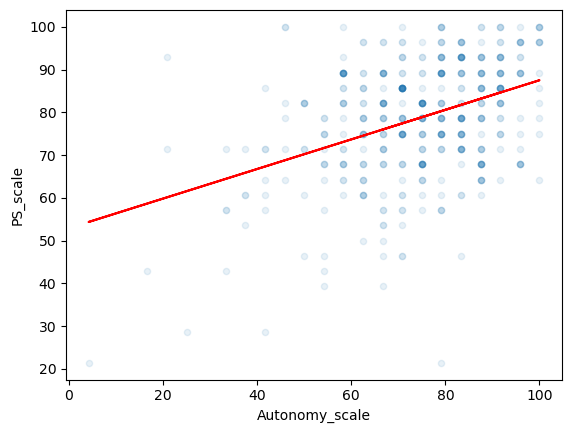

In [183]:
sub_data.plot.scatter(x='Autonomy_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [184]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,52.4376,3.0819,17.0145,0.0000,0.1564,0.1509,46.3813,58.4939
1,Autonomy_scale,0.3470,0.0374,9.2722,0.0000,0.1564,0.1509,0.2735,0.4205
2,Gender,-0.1863,1.4537,-0.1281,0.8981,0.1564,0.1509,-3.0430,2.6704
3,TeamSize,0.0541,0.1257,0.4301,0.6673,0.1564,0.1509,-0.1929,0.3010


### Model 2

In [185]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,53.8402,3.0969,17.3852,0.0000,0.1736,0.1647,47.7545,59.9260
1,Autonomy_scale,0.3419,0.0372,9.1927,0.0000,0.1736,0.1647,0.2688,0.4150
2,Gender,-0.3375,1.4431,-0.2338,0.8152,0.1736,0.1647,-3.1734,2.4985
3,TeamSize,0.0924,0.1253,0.7373,0.4613,0.1736,0.1647,-0.1538,0.3386
4,Outsourced,-3.3699,1.3141,-2.5644,0.0106,0.1736,0.1647,-5.9523,-0.7876
5,Mixed,-4.5170,2.0505,-2.2029,0.0281,0.1736,0.1647,-8.5465,-0.4876


### Model 3

In [186]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,51.0347,3.2355,15.7731,0.0000,0.2046,0.189,44.6763,57.3930
1,Autonomy_scale,0.3280,0.0369,8.8825,0.0000,0.2046,0.189,0.2555,0.4006
2,Gender,-0.0168,1.4354,-0.0117,0.9907,0.2046,0.189,-2.8376,2.8040
3,TeamSize,0.0690,0.1245,0.5548,0.5793,0.2046,0.189,-0.1755,0.3136
4,Outsourced,-2.6948,1.3076,-2.0608,0.0399,0.2046,0.189,-5.2645,-0.1251
5,Mixed,-4.3494,2.0288,-2.1438,0.0326,0.2046,0.189,-8.3362,-0.3625
6,3 - 5 years,2.2505,1.6813,1.3385,0.1814,0.2046,0.189,-1.0535,5.5545
7,6 - 8 years,6.1765,1.8850,3.2766,0.0011,0.2046,0.189,2.4722,9.8809
8,9 - 11 years,6.0984,2.2738,2.6820,0.0076,0.2046,0.189,1.6300,10.5668
9,More than 12 years,5.7916,1.7985,3.2202,0.0014,0.2046,0.189,2.2572,9.3260


### Model 4

In [187]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,49.0158,3.5925,13.6439,0.0000,0.2193,0.1952,41.9558,56.0759
1,Autonomy_scale,0.3263,0.0369,8.8440,0.0000,0.2193,0.1952,0.2538,0.3988
2,Gender,-0.0675,1.4488,-0.0466,0.9629,0.2193,0.1952,-2.9147,2.7797
3,TeamSize,0.1165,0.1297,0.8983,0.3695,0.2193,0.1952,-0.1384,0.3715
4,Outsourced,-2.3270,1.3176,-1.7660,0.0781,0.2193,0.1952,-4.9164,0.2624
5,Mixed,-4.0339,2.0328,-1.9844,0.0478,0.2193,0.1952,-8.0288,-0.0391
6,3 - 5 years,2.0802,1.6854,1.2343,0.2177,0.2193,0.1952,-1.2319,5.3923
7,6 - 8 years,5.6229,1.8967,2.9646,0.0032,0.2193,0.1952,1.8955,9.3503
8,9 - 11 years,5.3368,2.3124,2.3079,0.0215,0.2193,0.1952,0.7925,9.8811
9,More than 12 years,4.4786,1.8913,2.3680,0.0183,0.2193,0.1952,0.7618,8.1955


### Model 5

In [188]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,48.4150,3.6867,13.1323,0.0000,0.2202,0.1943,41.1698,55.6602
1,Autonomy_scale,0.3276,0.0370,8.8637,0.0000,0.2202,0.1943,0.2549,0.4002
2,Gender,0.0091,1.4533,0.0063,0.9950,0.2202,0.1943,-2.8470,2.8652
3,TeamSize,0.1071,0.1304,0.8208,0.4122,0.2202,0.1943,-0.1493,0.3634
4,Outsourced,-2.1830,1.3329,-1.6378,0.1022,0.2202,0.1943,-4.8024,0.4365
5,Mixed,-3.9581,2.0365,-1.9436,0.0526,0.2202,0.1943,-7.9602,0.0440
6,3 - 5 years,2.1288,1.6875,1.2615,0.2078,0.2202,0.1943,-1.1876,5.4452
7,6 - 8 years,5.6264,1.8977,2.9649,0.0032,0.2202,0.1943,1.8970,9.3557
8,9 - 11 years,5.3076,2.3139,2.2938,0.0223,0.2202,0.1943,0.7603,9.8549
9,More than 12 years,4.5085,1.8927,2.3820,0.0176,0.2202,0.1943,0.7889,8.2282


## 7.4 Hypothesis 5 - Openness in communication

### Baseline model

In [189]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['Openness_scale']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,37.0308,2.7183,13.6226,0.0,0.3425,0.3411,31.6891,42.3725
1,Openness_scale,0.5370,0.0345,15.5801,0.0,0.3425,0.3411,0.4693,0.6048


In [190]:
X = sm.add_constant(sub_data[['Openness_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     173.6
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           6.31e-34
Time:                        08:39:53   Log-Likelihood:                -1781.4
No. Observations:                 468   AIC:                             3567.
Df Residuals:                     466   BIC:                             3575.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             37.0308      3.305     11.205      0.000      30.553      43.508
Openness_scale     0.5370      0.041     13.177      0.000       0.457       0.617
==============================================================================
Omnibus:                       12.944   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.457
Skew:                          -0.415   Prob(JB):                      0.00120
Kurtosis:                       3.035   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

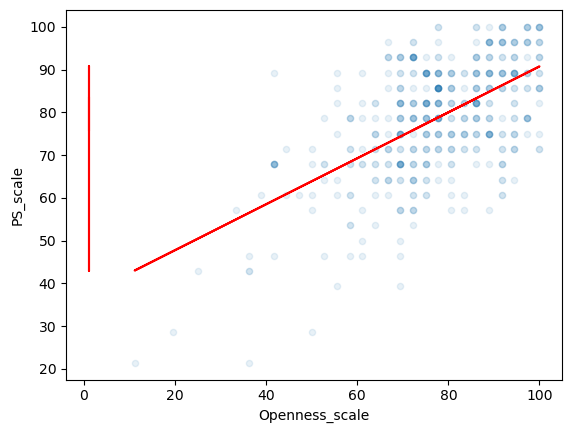

In [191]:
sub_data.plot.scatter(x='Openness_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [192]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     59.60
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.32e-32
Time:                        08:39:53   Log-Likelihood:                -1780.9
No. Observations:                 468   AIC:                             3570.
Df Residuals:                     464   BIC:                             3586.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             37.7676      3.337     11.317      0.000      31.227      44.309
Openness_scale     0.5388      0.041     13.257      0.000       0.459       0.618
Gender            -0.7230      1.295     -0.558      0.577      -3.262       1.816
TeamSize          -0.0929      0.124     -0.747      0.455      -0.337       0.151
==============================================================================
Omnibus:                       12.385   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.910
Skew:                          -0.407   Prob(JB):                      0.00157
Kurtosis:                       2.988   Cond. No.                         445.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 2

In [193]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     38.85
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.67e-33
Time:                        08:39:53   Log-Likelihood:                -1776.7
No. Observations:                 468   AIC:                             3565.
Df Residuals:                     462   BIC:                             3590.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             39.0742      3.458     11.300      0.000      32.297      45.851
Openness_scale     0.5323      0.041     12.949      0.000       0.452       0.613
Gender            -0.8318      1.275     -0.652      0.514      -3.332       1.668
TeamSize          -0.0596      0.121     -0.492      0.623      -0.297       0.178
Outsourced        -2.5684      1.145     -2.244      0.025      -4.812      -0.325
Mixed             -4.0669      1.835     -2.217      0.027      -7.662      -0.471
==============================================================================
Omnibus:                       13.398   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.017
Skew:                          -0.424   Prob(JB):                     0.000904
Kurtosis:                       3.007   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 3

In [194]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     28.44
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.21e-39
Time:                        08:39:53   Log-Likelihood:                -1763.1
No. Observations:                 468   AIC:                             3546.
Df Residuals:                     458   BIC:                             3588.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 34.4377      3.531      9.753      0.000      27.517      41.358
Openness_scale         0.5281      0.042     12.718      0.000       0.447       0.610
Gender                -0.5352      1.276     -0.419      0.675      -3.036       1.966
TeamSize              -0.0693      0.123     -0.564      0.573      -0.310       0.172
Outsourced            -1.8480      1.111     -1.663      0.096      -4.026       0.330
Mixed                 -3.9900      1.865     -2.140      0.032      -7.645      -0.335
3 - 5 years            3.9924      1.470      2.715      0.007       1.110       6.875
6 - 8 years            6.0937      1.571      3.878      0.000       3.014       9.174
9 - 11 years           7.5258      2.124      3.542      0.000       3.362      11.690
More than 12 years     7.2829      1.557      4.679      0.000       4.232      10.334
==============================================================================
Omnibus:                       14.883   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.403
Skew:                          -0.426   Prob(JB):                     0.000452
Kurtosis:                       3.252   Cond. No.                         543.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 4

In [195]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     20.96
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           5.85e-41
Time:                        08:39:53   Log-Likelihood:                -1755.5
No. Observations:                 468   AIC:                             3541.
Df Residuals:                     453   BIC:                             3603.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.6667      3.801      8.332      0.000      24.218      39.116
Openness_scale               0.5322      0.040     13.410      0.000       0.454       0.610
Gender                      -0.4760      1.232     -0.386      0.699      -2.891       1.939
TeamSize                    -0.0148      0.121     -0.122      0.903      -0.251       0.222
Outsourced                  -1.5016      1.099     -1.366      0.172      -3.656       0.653
Mixed                       -3.5651      1.850     -1.927      0.054      -7.191       0.061
3 - 5 years                  3.8047      1.452      2.620      0.009       0.959       6.650
6 - 8 years                  5.5769      1.599      3.487      0.000       2.442       8.712
9 - 11 years                 6.9287      2.104      3.293      0.001       2.805      11.053
More than 12 years           6.1311      1.656      3.702      0.000       2.885       9.377
Software engineer            3.2073      1.786      1.796      0.072      -0.293       6.707
Senior software engineer     5.4462      1.952      2.790      0.005       1.621       9.272
Tech Lead                    2.2870      2.111      1.083      0.279      -1.851       6.425
QA                          -0.2056      1.917     -0.107      0.915      -3.963       3.552
Other                        1.8754      2.258      0.830      0.406      -2.551       6.301
==============================================================================
Omnibus:                       13.901   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.328
Skew:                          -0.402   Prob(JB):                     0.000774
Kurtosis:                       3.298   Cond. No.                         678.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 5

In [196]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     19.64
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.64e-40
Time:                        08:39:53   Log-Likelihood:                -1755.4
No. Observations:                 468   AIC:                             3543.
Df Residuals:                     452   BIC:                             3609.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.4316      3.868      8.126      0.000      23.850      39.013
Openness_scale               0.5322      0.040     13.394      0.000       0.454       0.610
Gender                      -0.4404      1.237     -0.356      0.722      -2.866       1.985
TeamSize                    -0.0192      0.121     -0.159      0.874      -0.256       0.218
Outsourced                  -1.4364      1.110     -1.294      0.196      -3.612       0.739
Mixed                       -3.5301      1.855     -1.903      0.057      -7.166       0.106
3 - 5 years                  3.8284      1.452      2.636      0.008       0.982       6.675
6 - 8 years                  5.5802      1.600      3.487      0.000       2.444       8.717
9 - 11 years                 6.9159      2.105      3.285      0.001       2.790      11.042
More than 12 years           6.1483      1.655      3.715      0.000       2.904       9.392
Software engineer            3.1831      1.770      1.798      0.072      -0.287       6.653
Senior software engineer     5.3891      1.931      2.790      0.005       1.604       9.175
Tech Lead                    2.2083      2.085      1.059      0.290      -1.879       6.296
QA                          -0.2497      1.902     -0.131      0.896      -3.977       3.478
Other                        1.8295      2.243      0.815      0.415      -2.567       6.226
Multiple teams               0.4094      0.978      0.419      0.675      -1.507       2.325
==============================================================================
Omnibus:                       14.402   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.907
Skew:                          -0.408   Prob(JB):                     0.000580
Kurtosis:                       3.312   Cond. No.                         679.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [197]:
NyX = sm.add_constant(X)

ols_robust=sm.OLS(Y, NyX).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     19.64
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.64e-40
Time:                        08:39:53   Log-Likelihood:                -1755.4
No. Observations:                 468   AIC:                             3543.
Df Residuals:                     452   BIC:                             3609.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.4316      3.868      8.126      0.000      23.850      39.013
Openness_scale               0.5322      0.040     13.394      0.000       0.454       0.610
Gender                      -0.4404      1.237     -0.356      0.722      -2.866       1.985
TeamSize                    -0.0192      0.121     -0.159      0.874      -0.256       0.218
Outsourced                  -1.4364      1.110     -1.294      0.196      -3.612       0.739
Mixed                       -3.5301      1.855     -1.903      0.057      -7.166       0.106
3 - 5 years                  3.8284      1.452      2.636      0.008       0.982       6.675
6 - 8 years                  5.5802      1.600      3.487      0.000       2.444       8.717
9 - 11 years                 6.9159      2.105      3.285      0.001       2.790      11.042
More than 12 years           6.1483      1.655      3.715      0.000       2.904       9.392
Software engineer            3.1831      1.770      1.798      0.072      -0.287       6.653
Senior software engineer     5.3891      1.931      2.790      0.005       1.604       9.175
Tech Lead                    2.2083      2.085      1.059      0.290      -1.879       6.296
QA                          -0.2497      1.902     -0.131      0.896      -3.977       3.478
Other                        1.8295      2.243      0.815      0.415      -2.567       6.226
Multiple teams               0.4094      0.978      0.419      0.675      -1.507       2.325
==============================================================================
Omnibus:                       14.402   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.907
Skew:                          -0.408   Prob(JB):                     0.000580
Kurtosis:                       3.312   Cond. No.                         679.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## 7.5 Hypothesis 6 - Management

### Baseline model: 

In [198]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Management_scale']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,53.6375,2.2257,24.0987,0.0,0.2239,0.2222,49.2637,58.0112
1,Management_scale,0.3439,0.0297,11.5936,0.0,0.2239,0.2222,0.2856,0.4022


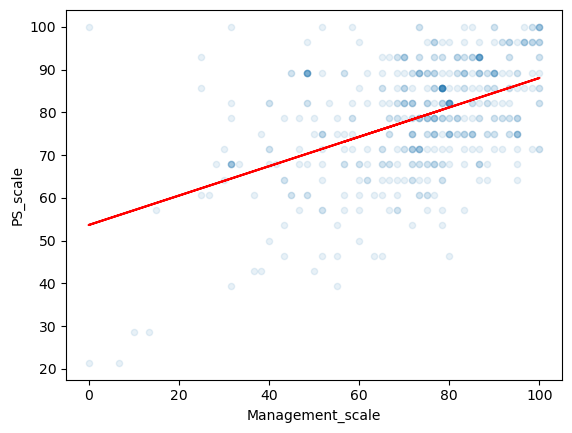

In [199]:
sub_data.plot.scatter(x='Management_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [200]:
X = sm.add_constant(sub_data[['Management_scale', 'Gender', 'TeamSize']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     20.97
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           9.31e-13
Time:                        08:39:53   Log-Likelihood:                -1819.9
No. Observations:                 468   AIC:                             3648.
Df Residuals:                     464   BIC:                             3664.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               54.3578      3.538     15.362      0.000      47.423      61.293
Management_scale     0.3454      0.045      7.688      0.000       0.257       0.433
Gender              -0.5791      1.486     -0.390      0.697      -3.491       2.333
TeamSize            -0.0899      0.139     -0.645      0.519      -0.363       0.183
==============================================================================
Omnibus:                        5.415   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.589
Skew:                          -0.186   Prob(JB):                       0.0611
Kurtosis:                       3.385   Cond. No.                         329.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 2

In [201]:
X = sm.add_constant(sub_data[['Management_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     17.38
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           8.86e-16
Time:                        08:39:53   Log-Likelihood:                -1816.3
No. Observations:                 468   AIC:                             3645.
Df Residuals:                     462   BIC:                             3670.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               55.5653      3.710     14.976      0.000      48.293      62.837
Management_scale     0.3394      0.045      7.462      0.000       0.250       0.429
Gender              -0.6801      1.449     -0.469      0.639      -3.521       2.160
TeamSize            -0.0565      0.136     -0.415      0.678      -0.323       0.210
Outsourced          -2.4050      1.224     -1.965      0.049      -4.804      -0.006
Mixed               -4.3100      1.976     -2.181      0.029      -8.184      -0.436
==============================================================================
Omnibus:                        6.924   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.001
Skew:                          -0.241   Prob(JB):                       0.0302
Kurtosis:                       3.355   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 3

In [202]:
X = sm.add_constant(sub_data[['Management_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     16.02
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           6.85e-23
Time:                        08:39:53   Log-Likelihood:                -1801.1
No. Observations:                 468   AIC:                             3622.
Df Residuals:                     458   BIC:                             3664.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.5273      3.613     13.984      0.000      43.446      57.609
Management_scale       0.3433      0.045      7.699      0.000       0.256       0.431
Gender                -0.3820      1.478     -0.258      0.796      -3.279       2.515
TeamSize              -0.0833      0.136     -0.611      0.542      -0.351       0.184
Outsourced            -1.4583      1.160     -1.257      0.209      -3.732       0.815
Mixed                 -4.0319      1.988     -2.028      0.043      -7.929      -0.135
3 - 5 years            2.7769      1.499      1.853      0.064      -0.161       5.714
6 - 8 years            6.4345      1.716      3.750      0.000       3.072       9.797
9 - 11 years           7.9557      2.288      3.478      0.001       3.472      12.440
More than 12 years     7.8416      1.710      4.585      0.000       4.490      11.194
==============================================================================
Omnibus:                       10.538   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.976
Skew:                          -0.314   Prob(JB):                      0.00414
Kurtosis:                       3.410   Cond. No.                         476.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 4

In [203]:

X = sm.add_constant(sub_data[['Management_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     11.39
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.50e-22
Time:                        08:39:53   Log-Likelihood:                -1797.8
No. Observations:                 468   AIC:                             3626.
Df Residuals:                     453   BIC:                             3688.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       48.3488      4.014     12.045      0.000      40.482      56.216
Management_scale             0.3401      0.044      7.782      0.000       0.254       0.426
Gender                      -0.4870      1.463     -0.333      0.739      -3.354       2.380
TeamSize                    -0.0596      0.133     -0.449      0.653      -0.319       0.200
Outsourced                  -1.1469      1.172     -0.978      0.328      -3.445       1.151
Mixed                       -3.6843      1.967     -1.873      0.061      -7.539       0.171
3 - 5 years                  2.6880      1.492      1.802      0.072      -0.236       5.612
6 - 8 years                  6.0978      1.757      3.470      0.001       2.653       9.542
9 - 11 years                 7.5067      2.276      3.298      0.001       3.045      11.968
More than 12 years           6.9305      1.825      3.797      0.000       3.353      10.508
Software engineer            2.8126      1.900      1.480      0.139      -0.912       6.537
Senior software engineer     4.7864      2.107      2.272      0.023       0.657       8.915
Tech Lead                    2.6269      2.335      1.125      0.261      -1.949       7.203
QA                           1.3208      2.077      0.636      0.525      -2.749       5.391
Other                        2.2092      2.395      0.922      0.356      -2.485       6.903
==============================================================================
Omnibus:                        8.988   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.160
Skew:                          -0.291   Prob(JB):                       0.0103
Kurtosis:                       3.362   Cond. No.                         625.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 5

In [204]:
X = sm.add_constant(sub_data[['Management_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     10.64
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           4.26e-22
Time:                        08:39:53   Log-Likelihood:                -1797.5
No. Observations:                 468   AIC:                             3627.
Df Residuals:                     452   BIC:                             3693.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       47.7596      4.015     11.894      0.000      39.890      55.630
Management_scale             0.3410      0.044      7.825      0.000       0.256       0.426
Gender                      -0.4090      1.478     -0.277      0.782      -3.306       2.488
TeamSize                    -0.0698      0.134     -0.520      0.603      -0.333       0.194
Outsourced                  -0.9963      1.181     -0.843      0.399      -3.312       1.319
Mixed                       -3.6053      1.973     -1.828      0.068      -7.472       0.261
3 - 5 years                  2.7406      1.492      1.837      0.066      -0.183       5.664
6 - 8 years                  6.1039      1.757      3.474      0.001       2.661       9.547
9 - 11 years                 7.4828      2.265      3.303      0.001       3.043      11.922
More than 12 years           6.9702      1.827      3.815      0.000       3.389      10.551
Software engineer            2.7601      1.881      1.468      0.142      -0.926       6.446
Senior software engineer     4.6578      2.089      2.230      0.026       0.564       8.752
Tech Lead                    2.4516      2.313      1.060      0.289      -2.083       6.986
QA                           1.2257      2.066      0.593      0.553      -2.824       5.275
Other                        2.1125      2.389      0.884      0.377      -2.570       6.795
Multiple teams               0.9153      1.068      0.857      0.392      -1.179       3.009
==============================================================================
Omnibus:                        9.427   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.590
Skew:                          -0.303   Prob(JB):                      0.00827
Kurtosis:                       3.352   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## 7.6 Hypothesis 8 - Clear decision process

### Baseline model: 

In [205]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearDecisions_scale']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,36.4614,3.0401,11.9934,0.0,0.2986,0.2971,30.4874,42.4354
1,ClearDecisions_scale,0.5478,0.0389,14.0848,0.0,0.2986,0.2971,0.4714,0.6242


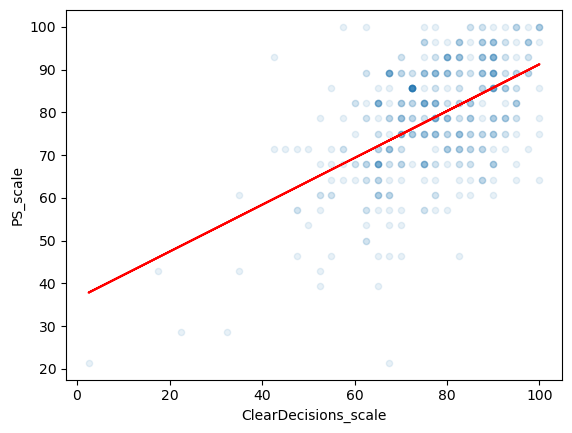

In [206]:
sub_data.plot.scatter(x='ClearDecisions_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [207]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     50.64
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.50e-28
Time:                        08:39:54   Log-Likelihood:                -1796.4
No. Observations:                 468   AIC:                             3601.
Df Residuals:                     464   BIC:                             3617.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   36.0240      3.708      9.714      0.000      28.756      43.292
ClearDecisions_scale     0.5487      0.045     12.320      0.000       0.461       0.636
Gender                  -0.2186      1.364     -0.160      0.873      -2.892       2.455
TeamSize                 0.0521      0.125      0.418      0.676      -0.192       0.296
==============================================================================
Omnibus:                       23.953   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.631
Skew:                          -0.502   Prob(JB):                     1.00e-06
Kurtosis:                       3.640   Cond. No.                         486.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 2

In [208]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     35.80
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           5.67e-31
Time:                        08:39:54   Log-Likelihood:                -1793.3
No. Observations:                 468   AIC:                             3599.
Df Residuals:                     462   BIC:                             3623.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   37.4903      3.855      9.725      0.000      29.935      45.046
ClearDecisions_scale     0.5395      0.045     12.005      0.000       0.451       0.628
Gender                  -0.3281      1.348     -0.243      0.808      -2.969       2.313
TeamSize                 0.0802      0.124      0.645      0.519      -0.163       0.324
Outsourced              -2.4603      1.167     -2.109      0.035      -4.747      -0.174
Mixed                   -3.4464      1.727     -1.996      0.046      -6.831      -0.062
==============================================================================
Omnibus:                       29.373   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.499
Skew:                          -0.559   Prob(JB):                     1.96e-08
Kurtosis:                       3.756   Cond. No.                         497.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 3

In [209]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     22.58
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           8.08e-32
Time:                        08:39:54   Log-Likelihood:                -1784.9
No. Observations:                 468   AIC:                             3590.
Df Residuals:                     458   BIC:                             3631.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.1565      3.893      9.030      0.000      27.526      42.788
ClearDecisions_scale     0.5230      0.046     11.334      0.000       0.433       0.613
Gender                  -0.0532      1.372     -0.039      0.969      -2.742       2.636
TeamSize                 0.0629      0.127      0.497      0.619      -0.185       0.311
Outsourced              -1.8809      1.133     -1.660      0.097      -4.102       0.340
Mixed                   -3.3439      1.748     -1.913      0.056      -6.769       0.081
3 - 5 years              2.3537      1.516      1.553      0.120      -0.617       5.325
6 - 8 years              5.3379      1.692      3.155      0.002       2.022       8.654
9 - 11 years             5.6353      2.102      2.681      0.007       1.516       9.755
More than 12 years       5.4702      1.694      3.230      0.001       2.151       8.790
==============================================================================
Omnibus:                       36.380   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.394
Skew:                          -0.590   Prob(JB):                     1.14e-11
Kurtosis:                       4.091   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 4

In [210]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     15.98
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           9.48e-32
Time:                        08:39:54   Log-Likelihood:                -1778.9
No. Observations:                 468   AIC:                             3588.
Df Residuals:                     453   BIC:                             3650.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.6290      4.108      7.943      0.000      24.578      40.680
ClearDecisions_scale         0.5238      0.045     11.762      0.000       0.437       0.611
Gender                      -0.1407      1.319     -0.107      0.915      -2.727       2.445
TeamSize                     0.1125      0.125      0.899      0.369      -0.133       0.358
Outsourced                  -1.5007      1.131     -1.326      0.185      -3.718       0.717
Mixed                       -2.9475      1.738     -1.696      0.090      -6.353       0.459
3 - 5 years                  2.1451      1.516      1.415      0.157      -0.826       5.117
6 - 8 years                  4.7527      1.708      2.783      0.005       1.406       8.100
9 - 11 years                 4.8374      2.066      2.341      0.019       0.787       8.888
More than 12 years           4.1483      1.827      2.271      0.023       0.568       7.729
Software engineer            2.8019      1.756      1.596      0.111      -0.640       6.244
Senior software engineer     5.8770      1.978      2.971      0.003       2.000       9.754
Tech Lead                    2.6838      2.152      1.247      0.212      -1.535       6.902
QA                           0.8185      1.911      0.428      0.668      -2.927       4.564
Other                        1.4924      2.260      0.660      0.509      -2.937       5.922
==============================================================================
Omnibus:                       33.991   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.607
Skew:                          -0.583   Prob(JB):                     2.06e-10
Kurtosis:                       3.964   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 5

In [211]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     15.01
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.06e-31
Time:                        08:39:54   Log-Likelihood:                -1778.5
No. Observations:                 468   AIC:                             3589.
Df Residuals:                     452   BIC:                             3655.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.9973      4.256      7.518      0.000      23.656      40.339
ClearDecisions_scale         0.5250      0.045     11.726      0.000       0.437       0.613
Gender                      -0.0593      1.331     -0.045      0.964      -2.669       2.550
TeamSize                     0.1024      0.126      0.812      0.417      -0.145       0.350
Outsourced                  -1.3472      1.164     -1.157      0.247      -3.628       0.934
Mixed                       -2.8645      1.734     -1.652      0.099      -6.263       0.534
3 - 5 years                  2.1981      1.513      1.452      0.146      -0.768       5.164
6 - 8 years                  4.7561      1.708      2.784      0.005       1.408       8.104
9 - 11 years                 4.8059      2.058      2.335      0.020       0.772       8.839
More than 12 years           4.1826      1.827      2.290      0.022       0.602       7.763
Software engineer            2.7475      1.737      1.582      0.114      -0.657       6.152
Senior software engineer     5.7471      1.965      2.925      0.003       1.896       9.598
Tech Lead                    2.5032      2.129      1.176      0.240      -1.669       6.675
QA                           0.7188      1.894      0.380      0.704      -2.993       4.430
Other                        1.3901      2.245      0.619      0.536      -3.010       5.790
Multiple teams               0.9430      1.062      0.888      0.375      -1.139       3.025
==============================================================================
Omnibus:                       35.698   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.129
Skew:                          -0.593   Prob(JB):                     3.54e-11
Kurtosis:                       4.030   Cond. No.                         685.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## 7.7 Hypothesis 9 - Clear Feedback

### Baseline model: 

In [212]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,45.1112,2.5347,17.7974,0.0,0.2819,0.2804,40.1304,50.0921
1,ClearFeedback_scale,0.4295,0.0317,13.5265,0.0,0.2819,0.2804,0.3671,0.4919


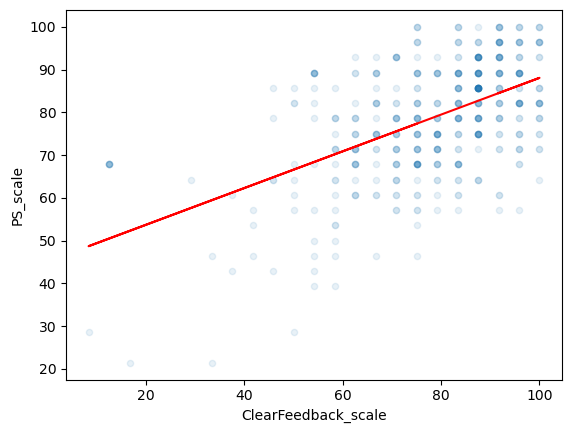

In [213]:
sub_data.plot.scatter(x='ClearFeedback_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [214]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,44.9608,2.7325,16.4539,0.0000,0.2824,0.2777,39.5911,50.3304
1,ClearFeedback_scale,0.4301,0.0318,13.5092,0.0000,0.2824,0.2777,0.3675,0.4927
2,Gender,-0.6316,1.3413,-0.4709,0.6379,0.2824,0.2777,-3.2674,2.0042
3,TeamSize,0.0280,0.1157,0.2416,0.8092,0.2824,0.2777,-0.1994,0.2554


### Model 2

In [215]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,46.3108,2.7823,16.6447,0.0000,0.2915,0.2838,40.8433,51.7784
1,ClearFeedback_scale,0.4223,0.0319,13.2452,0.0000,0.2915,0.2838,0.3597,0.4850
2,Gender,-0.7323,1.3366,-0.5479,0.5841,0.2915,0.2838,-3.3589,1.8943
3,TeamSize,0.0559,0.1158,0.4828,0.6295,0.2915,0.2838,-0.1716,0.2835
4,Outsourced,-2.4312,1.2211,-1.9910,0.0471,0.2915,0.2838,-4.8307,-0.0317
5,Mixed,-3.3708,1.9007,-1.7734,0.0768,0.2915,0.2838,-7.1059,0.3643


### Model 3

In [216]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,41.0571,2.9881,13.7402,0.0000,0.3343,0.3213,35.1850,46.9292
1,ClearFeedback_scale,0.4213,0.0311,13.5480,0.0000,0.3343,0.3213,0.3602,0.4824
2,Gender,-0.2826,1.3134,-0.2152,0.8297,0.3343,0.3213,-2.8637,2.2984
3,TeamSize,0.0467,0.1137,0.4108,0.6814,0.3343,0.3213,-0.1767,0.2701
4,Outsourced,-1.6366,1.2007,-1.3631,0.1735,0.3343,0.3213,-3.9962,0.7230
5,Mixed,-3.2564,1.8575,-1.7531,0.0803,0.3343,0.3213,-6.9068,0.3940
6,3 - 5 years,4.0400,1.5374,2.6279,0.0089,0.3343,0.3213,1.0188,7.0612
7,6 - 8 years,7.4696,1.7207,4.3411,0.0000,0.3343,0.3213,4.0882,10.8510
8,9 - 11 years,7.1056,2.0800,3.4161,0.0007,0.3343,0.3213,3.0180,11.1932
9,More than 12 years,7.6812,1.6339,4.7012,0.0000,0.3343,0.3213,4.4703,10.8920


### Model 4

In [217]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,38.2415,3.3638,11.3685,0.0000,0.3456,0.3254,31.6309,44.8521
1,ClearFeedback_scale,0.4212,0.0313,13.4444,0.0000,0.3456,0.3254,0.3596,0.4827
2,Gender,-0.3001,1.3267,-0.2262,0.8211,0.3456,0.3254,-2.9073,2.3070
3,TeamSize,0.0734,0.1187,0.6186,0.5365,0.3456,0.3254,-0.1598,0.3067
4,Outsourced,-1.3674,1.2103,-1.1298,0.2592,0.3456,0.3254,-3.7460,1.0111
5,Mixed,-2.9209,1.8629,-1.5680,0.1176,0.3456,0.3254,-6.5819,0.7400
6,3 - 5 years,4.0485,1.5436,2.6228,0.0090,0.3456,0.3254,1.0151,7.0820
7,6 - 8 years,7.2919,1.7339,4.2055,0.0000,0.3456,0.3254,3.8844,10.6993
8,9 - 11 years,7.0282,2.1192,3.3165,0.0010,0.3456,0.3254,2.8636,11.1929
9,More than 12 years,7.1715,1.7208,4.1676,0.0000,0.3456,0.3254,3.7898,10.5532


### Model 5

In [218]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,38.4471,3.4017,11.3024,0.0000,0.3459,0.3242,31.7621,45.1322
1,ClearFeedback_scale,0.4219,0.0314,13.4342,0.0000,0.3459,0.3242,0.3602,0.4837
2,Gender,-0.3419,1.3315,-0.2568,0.7975,0.3459,0.3242,-2.9587,2.2748
3,TeamSize,0.0785,0.1194,0.6576,0.5111,0.3459,0.3242,-0.1561,0.3132
4,Outsourced,-1.4397,1.2234,-1.1768,0.2399,0.3459,0.3242,-3.8438,0.9645
5,Mixed,-2.9592,1.8667,-1.5852,0.1136,0.3459,0.3242,-6.6277,0.7094
6,3 - 5 years,4.0235,1.5461,2.6023,0.0096,0.3459,0.3242,0.9850,7.0620
7,6 - 8 years,7.2892,1.7355,4.2001,0.0000,0.3459,0.3242,3.8786,10.6997
8,9 - 11 years,7.0455,2.1215,3.3210,0.0010,0.3459,0.3242,2.8763,11.2148
9,More than 12 years,7.1531,1.7229,4.1518,0.0000,0.3459,0.3242,3.7672,10.5390


# 8. Heteroscedasticity

## 8.1 Heteroscedasticity in control variables

### TeamSize

In [219]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['TeamSize_10']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [220]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 1.345124976895371, 'Test Statistic p-value': 0.5103990090613377, 'F-Statistic': 0.6701774134743392, 'F-Test p-value': 0.5121112574168358}


## 8.2 Heteroscedasticity in X_scales

### Colocated

In [221]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data[['Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()


In [222]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 2.435501922381902, 'Test Statistic p-value': 0.48706016740367974, 'F-Statistic': 0.809105860843084, 'F-Test p-value': 0.4892573512944922}


### Working together

In [223]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data[['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [224]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 1.141079639154528, 'Test Statistic p-value': 0.7671676774591217, 'F-Statistic': 0.3780306565692795, 'F-Test p-value': 0.768890796093187}


### Autonomy scale

In [225]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['Autonomy_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [226]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 22.958345146752873, 'Test Statistic p-value': 1.034328983759454e-05, 'F-Statistic': 11.993967729560477, 'F-Test p-value': 8.336678144135828e-06}


### Openness scale

In [227]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['Openness_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [228]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 18.068873572909126, 'Test Statistic p-value': 0.00011923230958993691, 'F-Statistic': 9.337013731549689, 'F-Test p-value': 0.00010575312275113706}


### Management scale

In [229]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['Management_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [230]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 109.73098986163643, 'Test Statistic p-value': 1.4866827579506112e-24, 'F-Statistic': 71.21033195971248, 'F-Test p-value': 1.0507232605522341e-27}


### Clear decisions scale

In [231]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['ClearDecisions_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [232]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 8.699952464298446, 'Test Statistic p-value': 0.01290711935132091, 'F-Statistic': 4.403959805364846, 'F-Test p-value': 0.012743043636483053}


### Clear feedback scale

In [233]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['ClearFeedback_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [234]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 48.858951530762795, 'Test Statistic p-value': 2.4570470864337335e-11, 'F-Statistic': 27.102347222706094, 'F-Test p-value': 7.355032541408139e-12}


# 9. Multikolonaritet

In [235]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set
X = sub_data[['Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                     feature       VIF
0                     Gender  1.293398
1                   TeamSize  4.150822
2                 Outsourced  1.416021
3                      Mixed  1.154094
4                3 - 5 years  2.106966
5                6 - 8 years  1.725164
6               9 - 11 years  1.446873
7         More than 12 years  2.175850
8          Software engineer  2.465270
9   Senior software engineer  2.219037
10                 Tech Lead  1.624506
11                        QA  2.169414
12                     Other  1.751748
13            Multiple teams  2.869795


<Axes: >

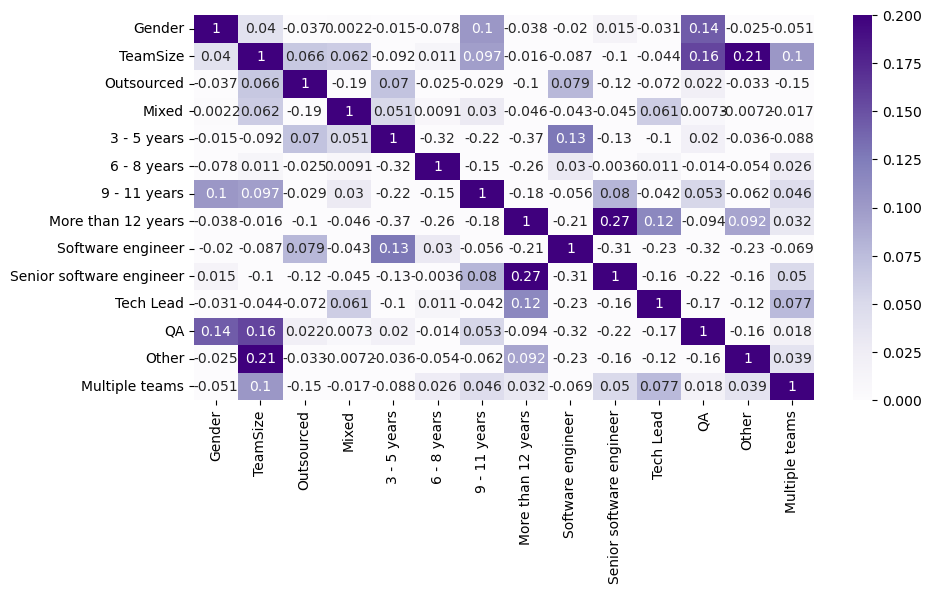

In [261]:
plt.figure(figsize=(10,5))
c = sub_data[['Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']].corr()
sns.heatmap(c, vmin=0, vmax=0.2, annot=True, cmap="Purples")

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set
X = sub_data[['Autonomy_scale', 'Openness_scale', 'Management_scale', 'ClearDecisions_scale', 'ClearFeedback_scale']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature         VIF
0        Autonomy_scale  176.421804
1        Openness_scale   79.389855
2      Management_scale   28.896321
3  ClearDecisions_scale  353.095362
4   ClearFeedback_scale   50.306503


# 10. Test Scales

In [238]:
Scales = sub_data[['Autonomy_scale', 'Openness_scale', 'Management_scale', 'ClearDecisions_scale', 'ClearFeedback_scale']]

In [239]:
Scales.corr()

,Autonomy_scale,Openness_scale,Management_scale,ClearDecisions_scale,ClearFeedback_scale
Autonomy_scale,1.000000,0.489498,0.415735,0.905293,0.355881
Openness_scale,0.489498,1.000000,0.577651,0.686091,0.680093
Management_scale,0.415735,0.577651,1.000000,0.533720,0.590922
ClearDecisions_scale,0.905293,0.686091,0.533720,1.000000,0.550500
ClearFeedback_scale,0.355881,0.680093,0.590922,0.550500,1.000000


<Axes: >

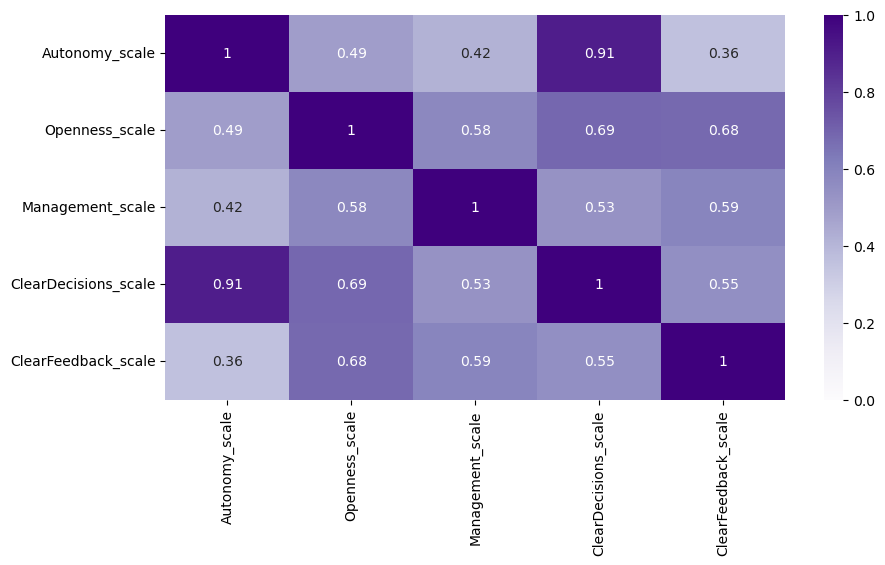

In [240]:
plt.figure(figsize=(10,5))
c = Scales.corr()
sns.heatmap(c, vmin=0, vmax=1, annot=True, cmap="Purples")

In [241]:
X = sm.add_constant(sub_data['Autonomy_scale'])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     53.51
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.13e-12
Time:                        08:39:55   Log-Likelihood:                -1839.8
No. Observations:                 468   AIC:                             3684.
Df Residuals:                     466   BIC:                             3692.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             52.9119      3.698     14.307      0.000      45.663      60.160
Autonomy_scale     0.3459      0.047      7.315      0.000       0.253       0.439
==============================================================================
Omnibus:                       36.170   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.212
Skew:                          -0.626   Prob(JB):                     9.23e-11
Kurtosis:                       3.897   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [242]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.21e-37
Time:                        08:39:55   Log-Likelihood:                -1775.8
No. Observations:                 468   AIC:                             3558.
Df Residuals:                     465   BIC:                             3570.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             32.6993      3.419      9.565      0.000      25.999      39.400
Autonomy_scale     0.1250      0.043      2.913      0.004       0.041       0.209
Openness_scale     0.4729      0.045     10.482      0.000       0.384       0.561
==============================================================================
Omnibus:                       13.473   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.953
Skew:                          -0.420   Prob(JB):                     0.000934
Kurtosis:                       3.093   Cond. No.                         652.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [243]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale', 'Management_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     79.34
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.91e-41
Time:                        08:39:55   Log-Likelihood:                -1768.1
No. Observations:                 468   AIC:                             3544.
Df Residuals:                     464   BIC:                             3561.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.5301      3.234      9.749      0.000      25.191      37.869
Autonomy_scale       0.0974      0.043      2.288      0.022       0.014       0.181
Openness_scale       0.3914      0.050      7.794      0.000       0.293       0.490
Management_scale     0.1312      0.043      3.039      0.002       0.047       0.216
==============================================================================
Omnibus:                        9.869   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.243
Skew:                          -0.356   Prob(JB):                      0.00597
Kurtosis:                       2.868   Cond. No.                         792.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [244]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale', 'Management_scale', 'ClearDecisions_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     71.50
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.88e-47
Time:                        08:39:55   Log-Likelihood:                -1755.7
No. Observations:                 468   AIC:                             3521.
Df Residuals:                     463   BIC:                             3542.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   28.5322      3.078      9.270      0.000      22.500      34.565
Autonomy_scale          -0.2678      0.090     -2.982      0.003      -0.444      -0.092
Openness_scale           0.2408      0.059      4.093      0.000       0.126       0.356
Management_scale         0.1071      0.040      2.680      0.007       0.029       0.185
ClearDecisions_scale     0.5660      0.123      4.594      0.000       0.325       0.808
==============================================================================
Omnibus:                       13.733   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.112
Skew:                          -0.403   Prob(JB):                     0.000862
Kurtosis:                       2.726   Cond. No.                         939.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [245]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale', 'Management_scale', 'ClearDecisions_scale', 'ClearFeedback_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     55.69
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.96e-45
Time:                        08:39:55   Log-Likelihood:                -1752.1
No. Observations:                 468   AIC:                             3516.
Df Residuals:                     462   BIC:                             3541.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.2561      3.247      8.394      0.000      20.892      33.620
Autonomy_scale          -0.2147      0.092     -2.329      0.020      -0.395      -0.034
Openness_scale           0.1944      0.060      3.259      0.001       0.078       0.311
Management_scale         0.0794      0.040      2.008      0.045       0.002       0.157
ClearDecisions_scale     0.4880      0.123      3.976      0.000       0.247       0.729
ClearFeedback_scale      0.1146      0.043      2.659      0.008       0.030       0.199
==============================================================================
Omnibus:                       12.070   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.478
Skew:                          -0.383   Prob(JB):                      0.00195
Kurtosis:                       2.768   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale', 'Management_scale', 'ClearDecisions_scale', 'ClearFeedback_scale', 'Gender', 'TeamSize', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     19.21
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.16e-46
Time:                        08:39:55   Log-Likelihood:                -1729.0
No. Observations:                 468   AIC:                             3498.
Df Residuals:                     448   BIC:                             3581.
Df Model:                          19                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       22.1668      3.771      5.878      0.000      14.775      29.559
Autonomy_scale              -0.2109      0.087     -2.426      0.015      -0.381      -0.041
Openness_scale               0.2211      0.058      3.834      0.000       0.108       0.334
Management_scale             0.0843      0.036      2.312      0.021       0.013       0.156
ClearDecisions_scale         0.4452      0.117      3.797      0.000       0.215       0.675
ClearFeedback_scale          0.1025      0.043      2.386      0.017       0.018       0.187
Gender                      -0.4412      1.170     -0.377      0.706      -2.735       1.853
TeamSize                     0.0040      0.114      0.035      0.972      -0.219       0.227
Outsourced                  -0.6154      1.072     -0.574      0.566      -2.717       1.486
Mixed                       -2.5206      1.494     -1.688      0.091      -5.448       0.407
3 - 5 years                  3.4241      1.389      2.465      0.014       0.701       6.147
6 - 8 years                  5.2787      1.514      3.487      0.000       2.312       8.246
9 - 11 years                 6.4723      1.879      3.444      0.001       2.789      10.155
More than 12 years           5.9532      1.554      3.831      0.000       2.908       8.999
Software engineer            3.5857      1.642      2.183      0.029       0.367       6.805
Senior software engineer     5.3556      1.782      3.006      0.003       1.864       8.847
Tech Lead                    2.4695      1.947      1.269      0.205      -1.346       6.285
QA                           0.7911      1.725      0.459      0.647      -2.590       4.172
Other                        2.3180      2.055      1.128      0.259      -1.709       6.345
Multiple teams               0.4650      0.933      0.499      0.618      -1.363       2.293
==============================================================================
Omnibus:                       12.206   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.760
Skew:                          -0.404   Prob(JB):                      0.00170
Kurtosis:                       2.953   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""